In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import csv
import pandas as pd
import folium
from folium import plugins
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rc("font", family="HYHeadline-Medium")
plt.rc("axes", unicode_minus=False) # y축
import warnings
warnings.filterwarnings(action='ignore')


# 전체현황분석

In [10]:
data = pd.read_csv('data/criminal_data.csv', header=None)
data.columns = ['날짜','경찰서명','전체발생건수','남자피해자','여자피해자','성별불상피해자','피해자 연령(6세이하)','피해자 연령(12세이하)','피해자 연령(15세이하)','피해자 연령(20세이하)','피해자 연령(30세이하)','피해자 연령(40세이하)','피해자 연령(50세이하)','피해자 연령(60세이하)','피해자 연령(60세초과)','피해자 연령(미상)','범죄유형(강력범죄)','범죄유형(폭력범죄)','범죄유형(절도범죄)','범죄유형(지능범죄)','범죄유형(기타범죄)','수사단서정보(고발)','수사단서정보(고소)','수사단서정보(진정)','수사단서정보(탄원)','수사단서정보(피해자신고)','수사단서정보(타인신고)','수사단서정보(탐문정보)','수사단서정보(불심검문)','수사단서정보(자수)','수사단서정보(여죄)','수사단서정보(변사체)','수사단서정보(현행범)','수사단서정보(기타)','발생요일(일)','발생요일(월)','발생요일(화)','발생요일(수)','발생요일(목)','발생요일(금)','발생요일(토)'
]
labelns= data.columns[21:34]
data.drop(axis=1, labels=labelns, inplace=True)
data.loc[:, '경찰서명'].replace('충남세종경찰서','세종경찰서', inplace=True)
data['지역명'] = data['경찰서명'].map(lambda x: x[0:2].strip())

In [11]:
def area(x):
    if(x=='강원')or(x=='동해')or(x=='속초'):
        return '강원'
    elif(x=='경기')or(x=='평택'):
        return '경기'
    elif(x=='경남')or(x=='남해')or(x=='창원')or(x=='통영'):
        return '경남'
    elif(x=='경북')or(x=='울진')or(x=='포항'):
        return '경북'
    elif(x=='광주'):
        return '광주'
    elif(x=='군산')or(x=='부안')or(x=='전북'):
        return'전북'
    elif(x=='목포')or(x=='서해')or(x=='여수')or(x=='완도')or(x=='전남'):
        return'전남'
    elif(x=='대구'):
        return'대구'
    elif(x=='대전'):
        return'대전'
    elif(x=='보령')or(x=='충남')or(x=='태안'):
        return'충남'
    elif(x=='부산'):
        return'부산'
    elif(x=='서귀')or(x=='제주'):
        return'제주'
    elif(x=='서울'):
        return'서울'
    elif(x=='울산'):
        return'울산'
    elif(x=='인천')or(x=='중부'):
        return'인천'
    elif(x=='충북'):
        return'충북'
    elif(x=='해양')or(x=='세종'):
        return'세종'


In [12]:
data['광역자치']=data['지역명'].apply(area)
data.columns = ['발생년월','경찰서','전체발생건수','피해자(남자)','피해자(여자)','성별미상',
'0~6세','7~12세','13~15세','16~20세','21~30세','31~40세','41~50세','51~60세','61세~','나이미상',
'강력','폭력','절도','지능','기타',
'일','월','화','수','목','금','토','지역명','광역자치']

In [13]:
dataset= data.copy()

In [14]:
dataset['년도'] = dataset['발생년월'].map(lambda x: str(x)[0:4])
dataset['월'] = dataset['발생년월'].map(lambda x: int(str(x)[4:6]))
spring = ['겨울','겨울','봄','봄','봄','여름','여름','여름','가을','가을','가을','겨울']
dataset['계절'] = dataset['월'].map(lambda x : spring[x-1])

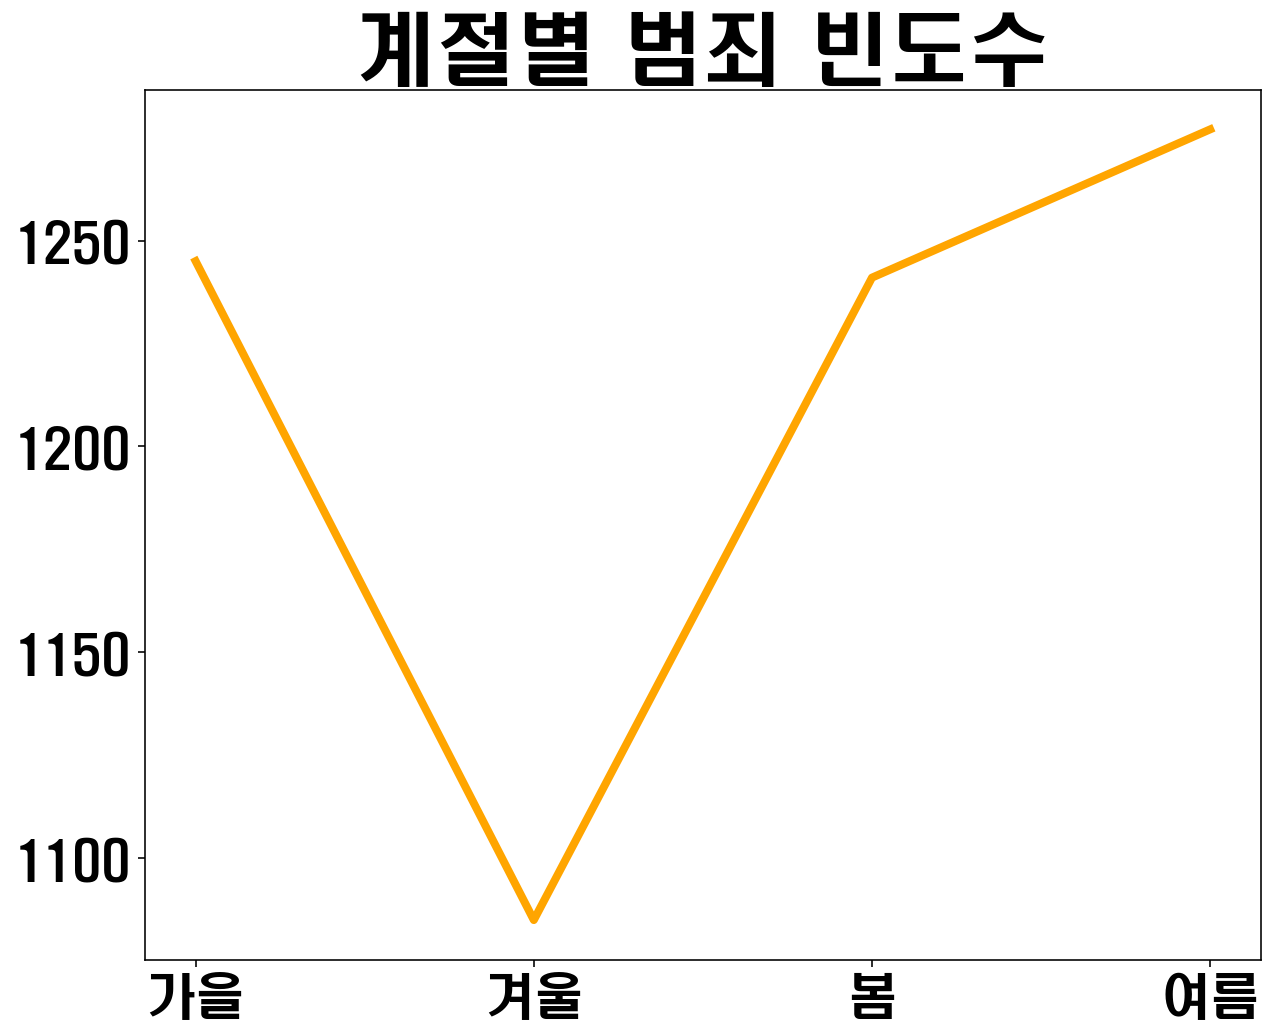

In [16]:
season_data= dataset.groupby('계절')['전체발생건수'].sum().reset_index()
season_data['천건당'] =  round(season_data['전체발생건수']/1000)
plt.figure(figsize=(10,8))
ax =sns.lineplot(data=season_data, x='계절',y='천건당', color='orange', linewidth=4)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.set(xlabel='',ylabel='')
plt.rc('font', size=25)
plt.title('계절별 범죄 빈도수', fontsize=40)
plt.show()

In [38]:
dataset.groupby('계절')['지능'].sum()

계절
가을    266324
겨울    240272
봄     258772
여름    262210
Name: 지능, dtype: int64

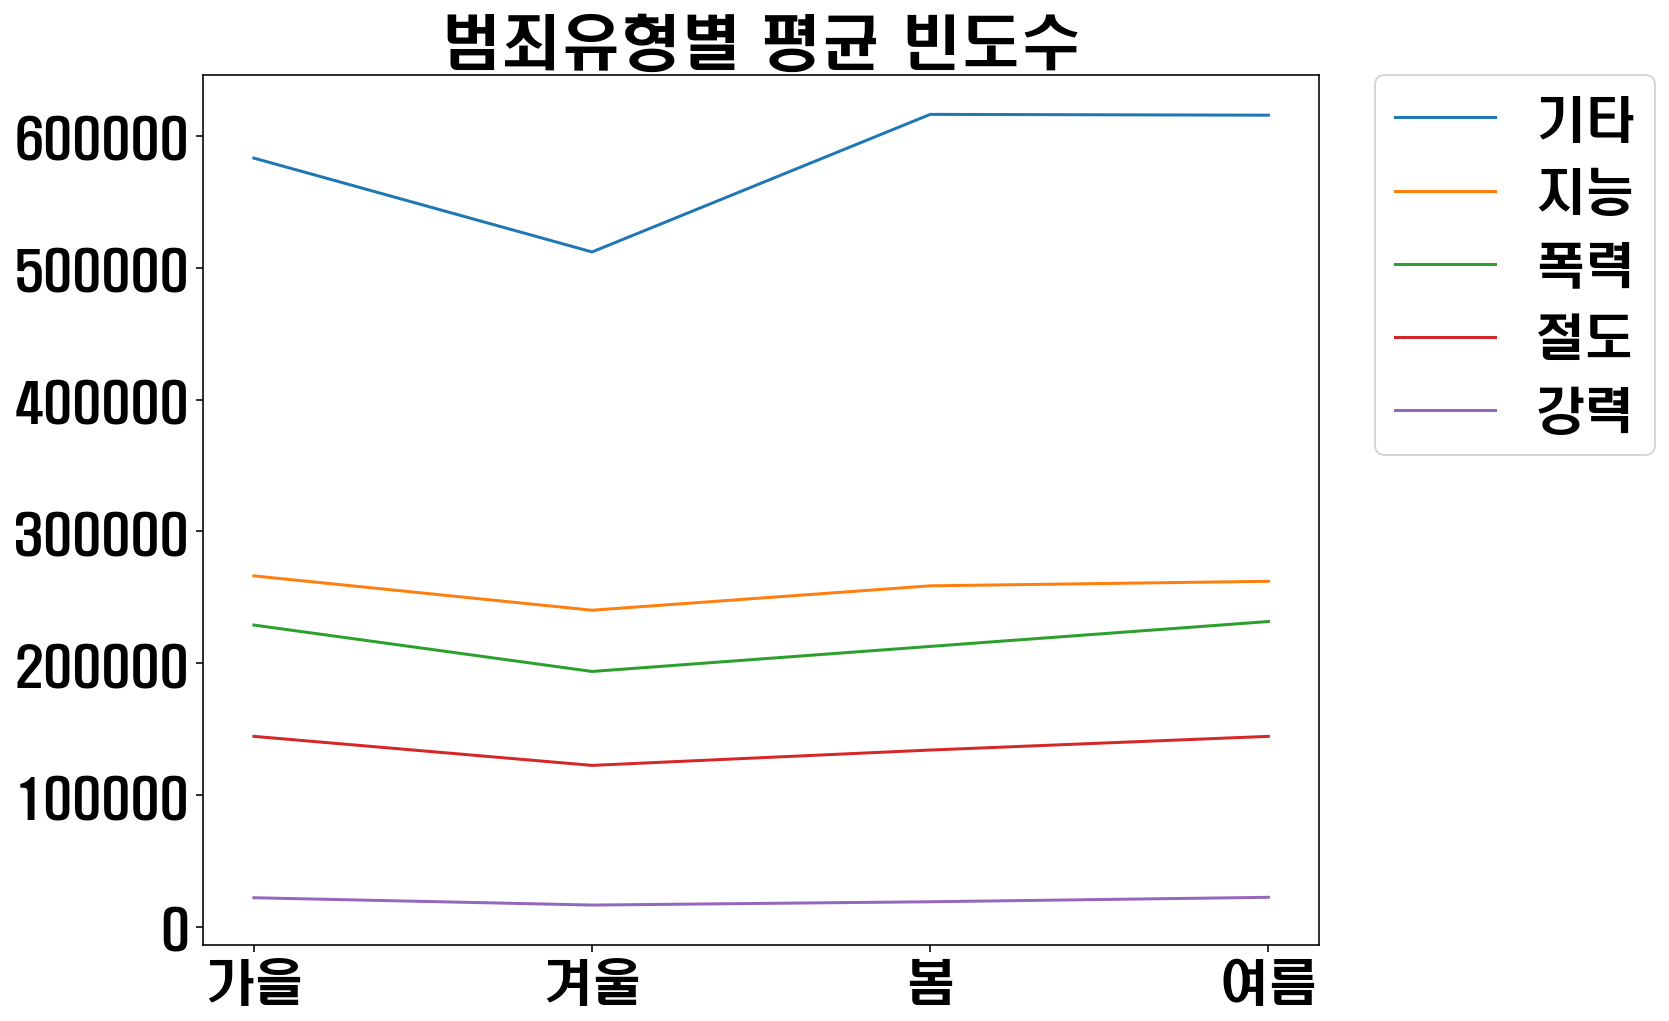

In [39]:
plt.figure(figsize=(10,8))
plt.plot(dataset.groupby('계절')['기타'].sum().index, dataset.groupby('계절')['기타'].sum(), label='기타')
plt.plot(dataset.groupby('계절')['지능'].sum().index, dataset.groupby('계절')['지능'].sum(), label='지능')
plt.plot(dataset.groupby('계절')['폭력'].sum().index, dataset.groupby('계절')['폭력'].sum(), label='폭력')
plt.plot(dataset.groupby('계절')['절도'].sum().index, dataset.groupby('계절')['절도'].sum(), label='절도')
plt.plot(dataset.groupby('계절')['강력'].sum().index, dataset.groupby('계절')['강력'].sum(), label='강력')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('범죄유형별 평균 빈도수')
plt.rc('font', size=20)
plt.show()

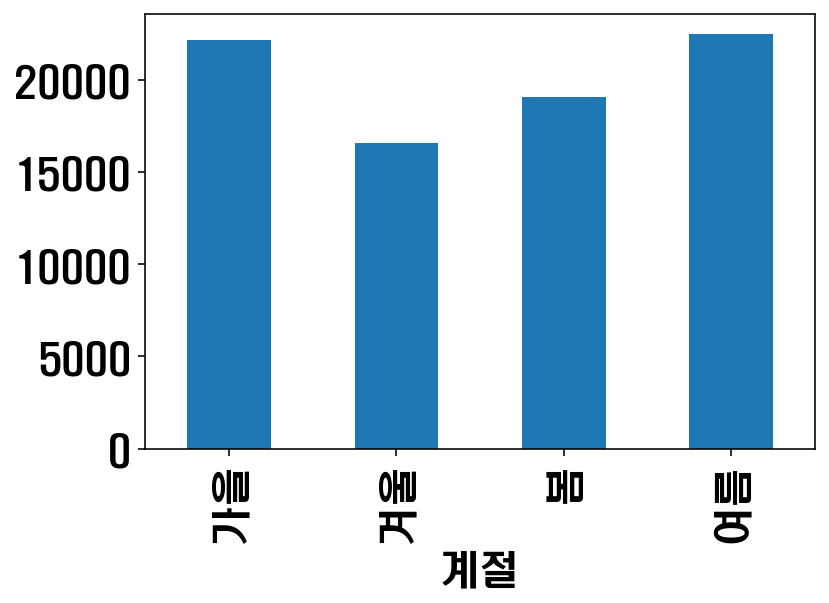

In [10]:
dataset.groupby('계절')['강력'].sum().plot(kind='bar')
plt.show()

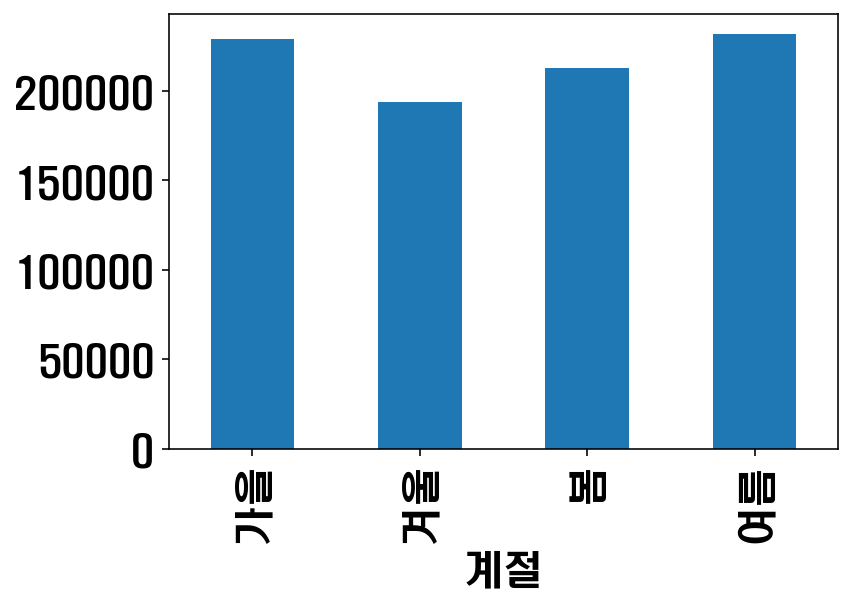

In [11]:
dataset.groupby('계절')['폭력'].sum().plot(kind='bar')
plt.show()

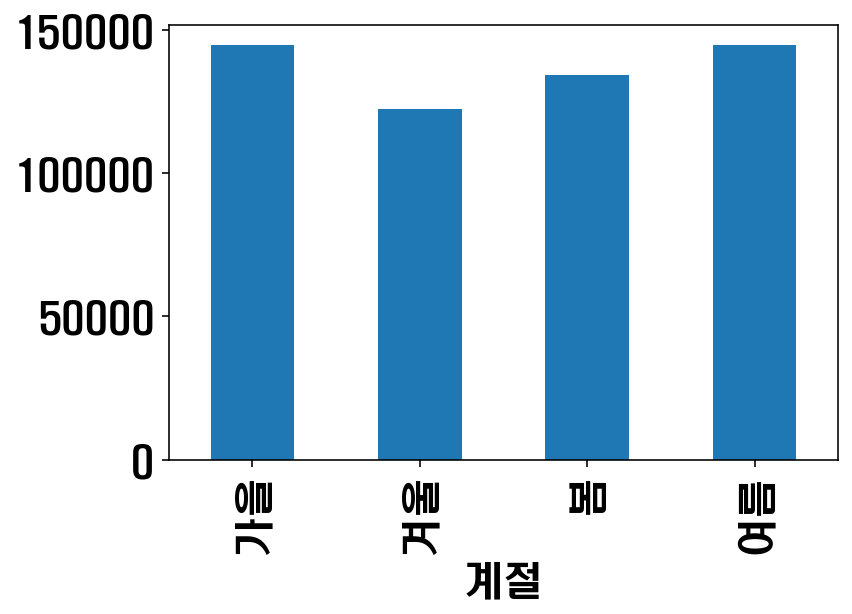

In [12]:
dataset.groupby('계절')['절도'].sum().plot(kind='bar')
plt.show()

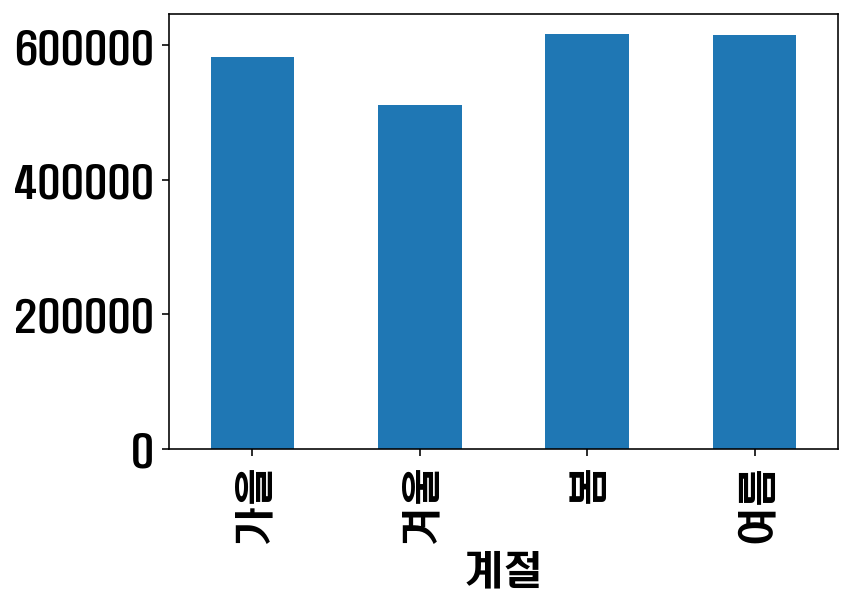

In [13]:
dataset.groupby('계절')['기타'].sum().plot(kind='bar')
plt.show()

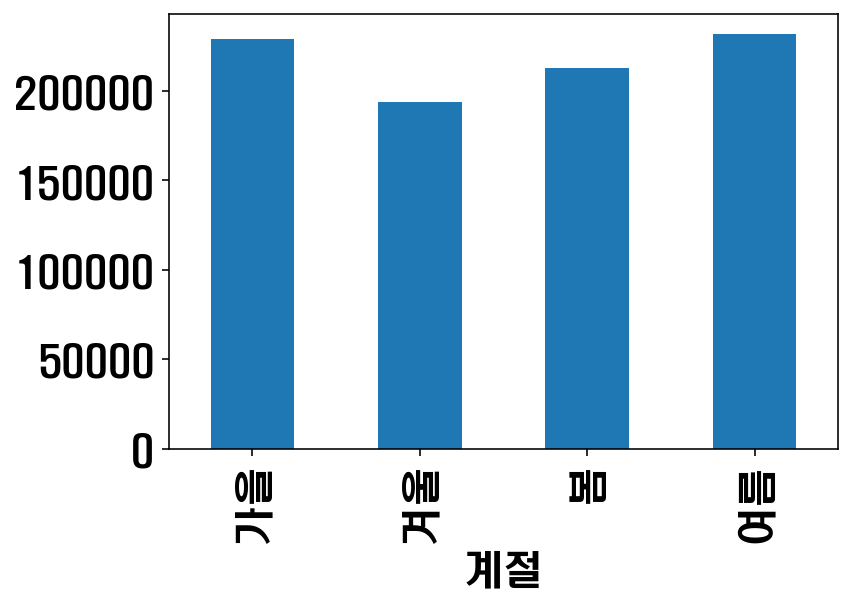

In [14]:
dataset.groupby('계절')['폭력'].sum().plot(kind='bar')
plt.show()

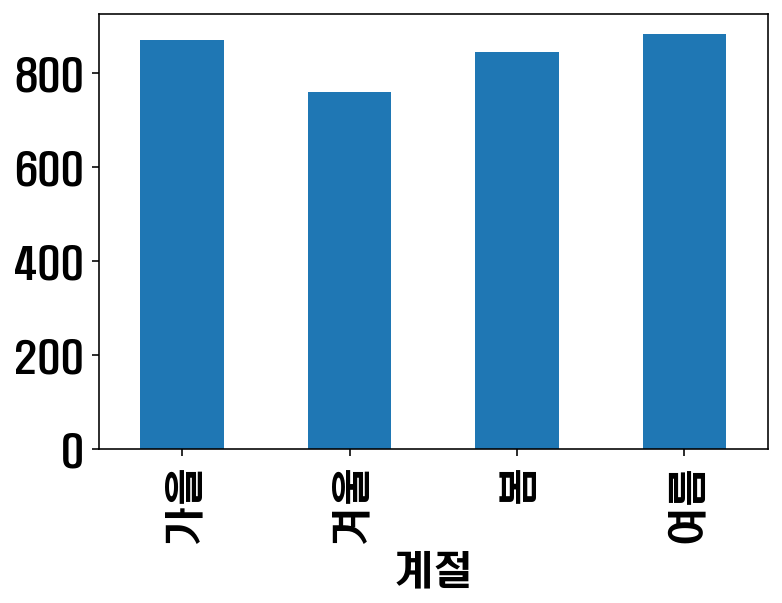

In [15]:
dataset.loc[dataset['광역자치']=='서울'].groupby('계절')['전체발생건수'].mean().plot(kind='bar')
plt.show()

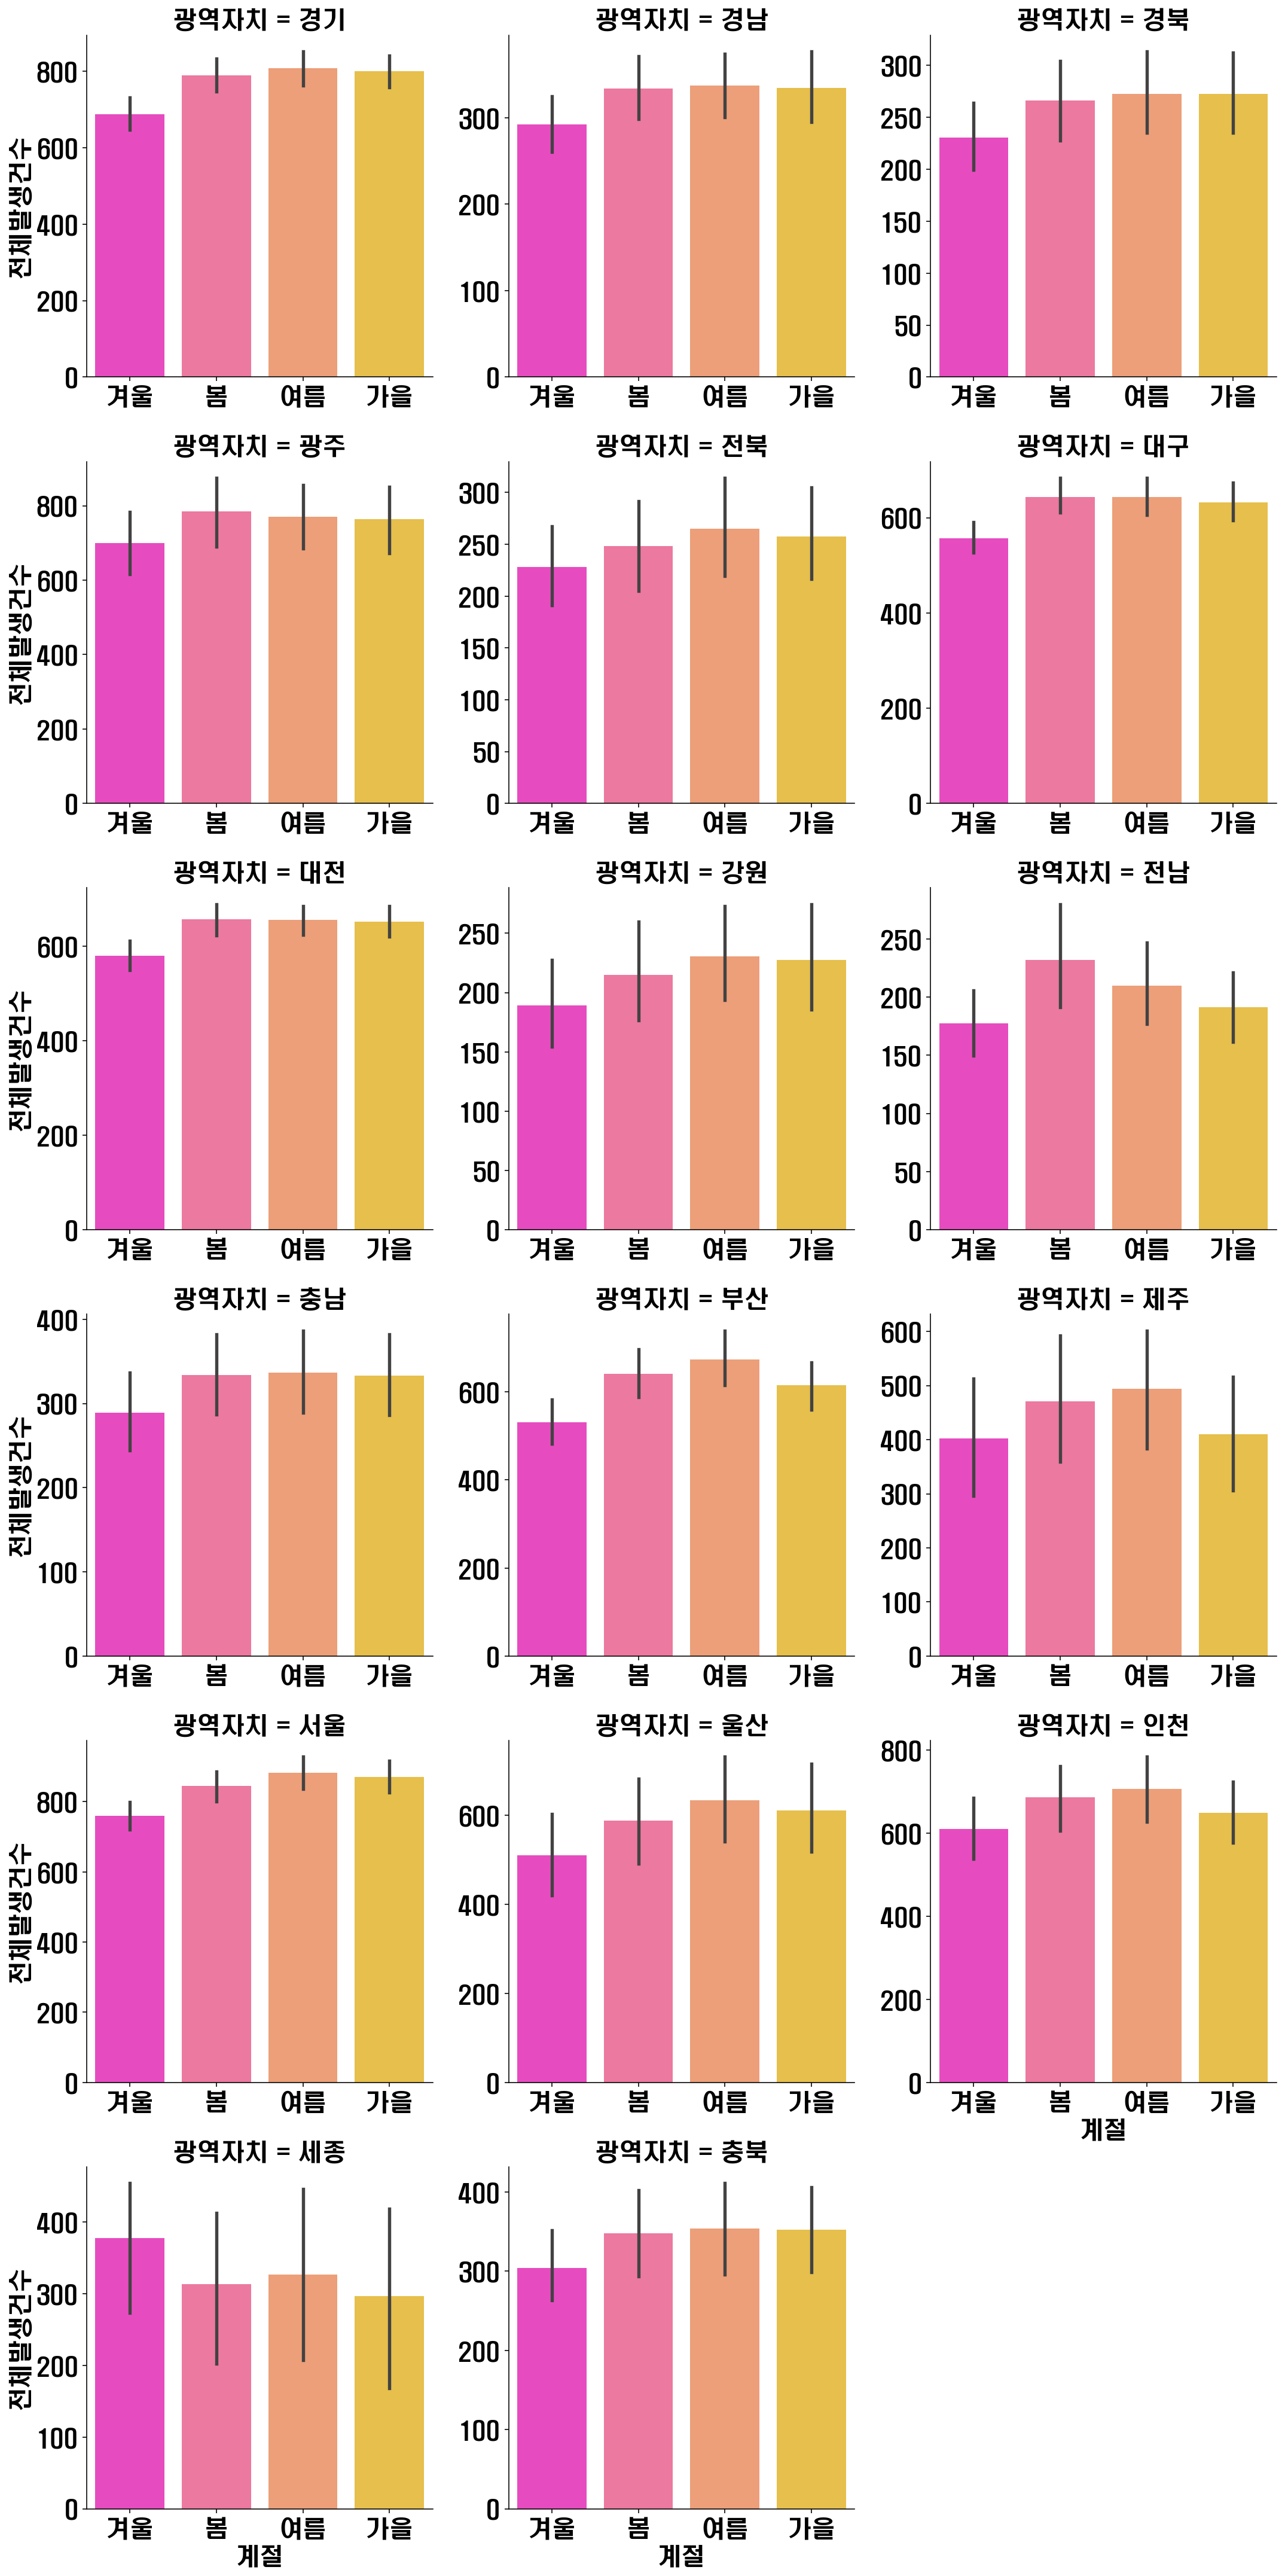

In [18]:
sns.catplot(x='계절', y='전체발생건수', data= dataset, kind='bar', col='광역자치',col_wrap=3,
           sharex=False, sharey=False, palette='spring')
plt.show()

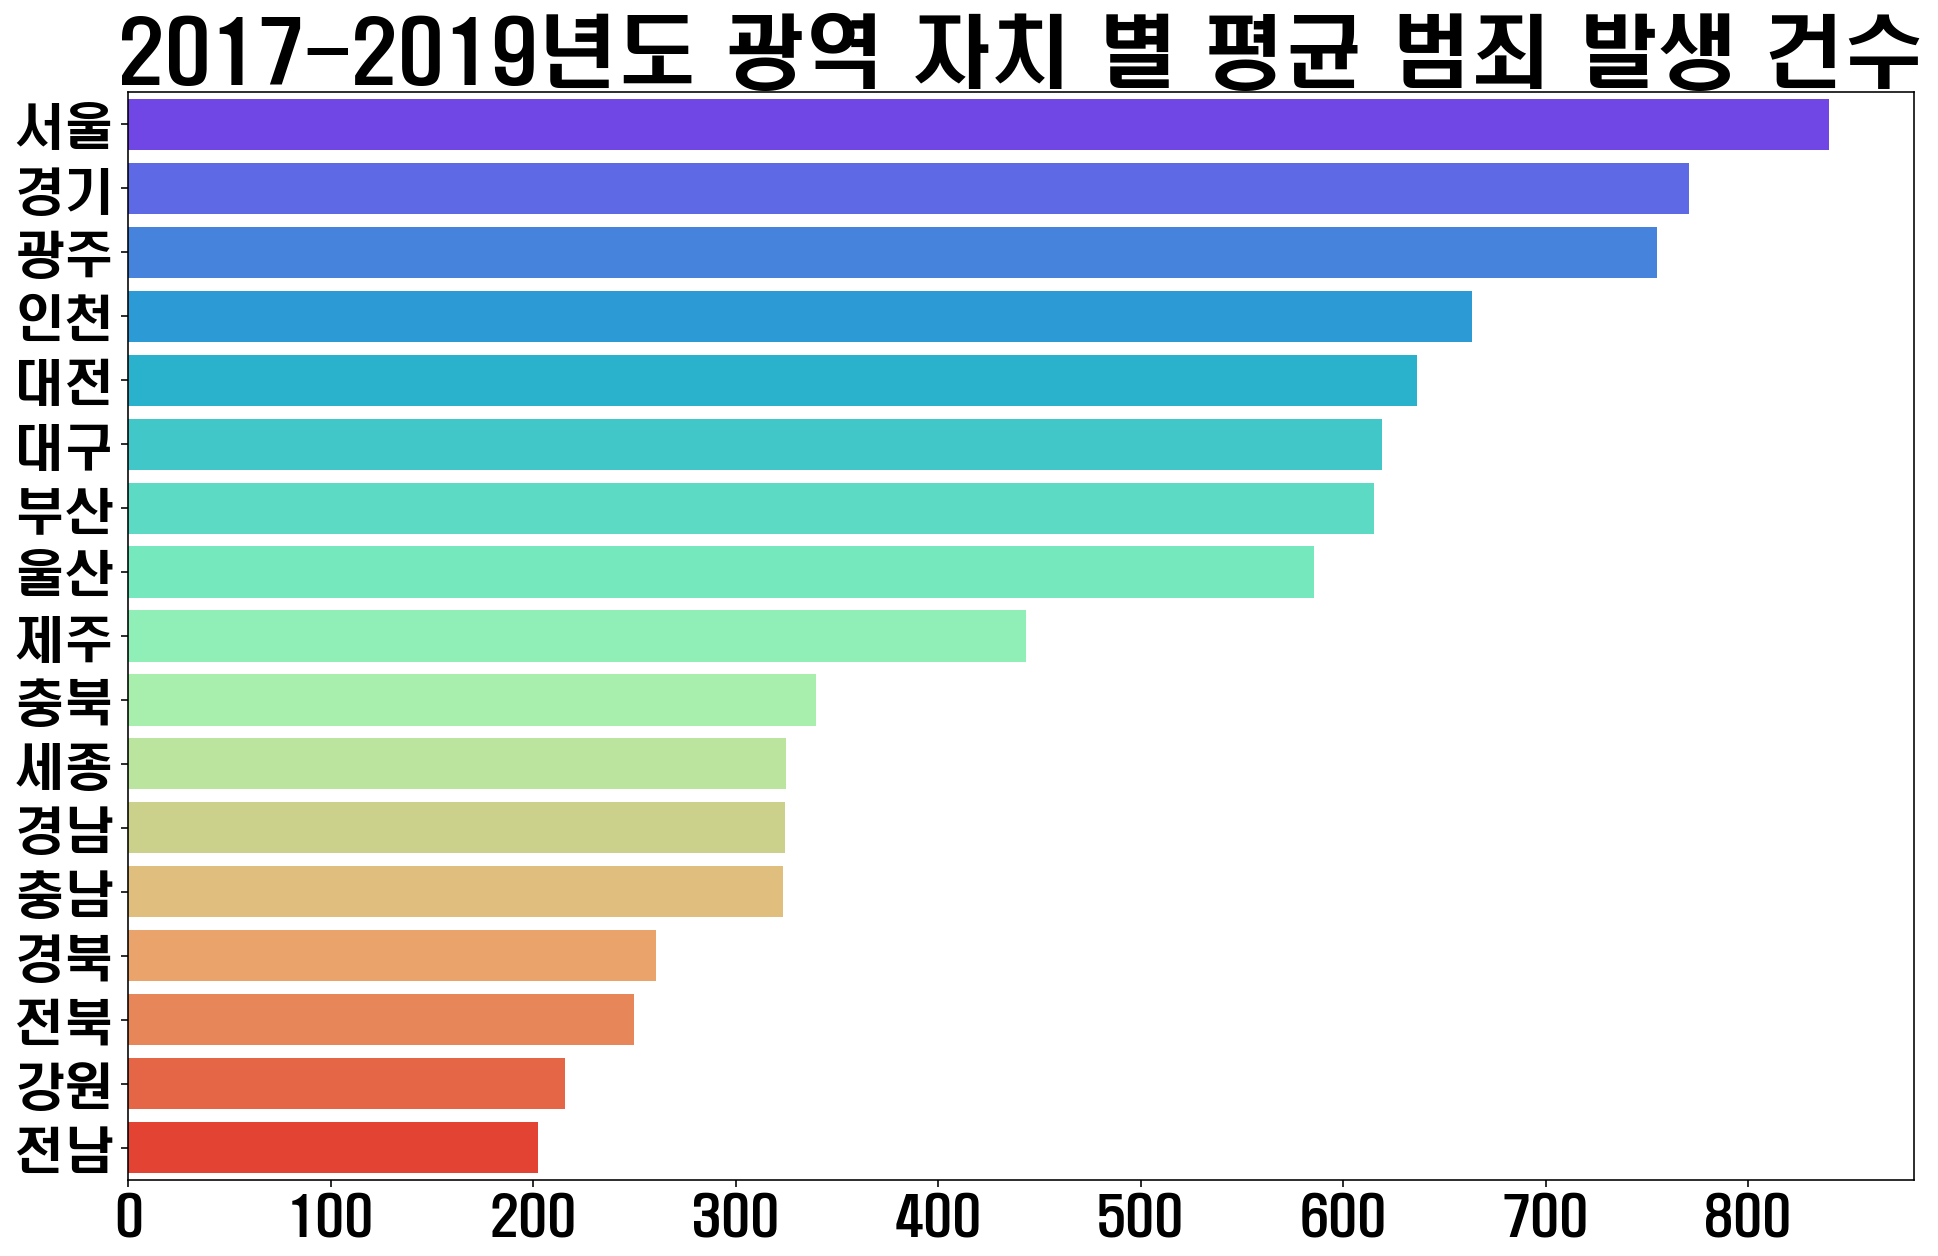

In [52]:
plt.figure(figsize=(16,10))
plt.title('2017-2019년도 광역 자치 별 평균 범죄 발생 건수', fontsize=40)
test= dataset.groupby('광역자치')['전체발생건수'].mean().reset_index().sort_values(by='전체발생건수', ascending=False)
ax=sns.barplot(x="전체발생건수", y="광역자치", data=test , ci=None,estimator=np.sum, palette='rainbow')
ax.set(xlabel='',ylabel='')
plt.rc('font', size=25)

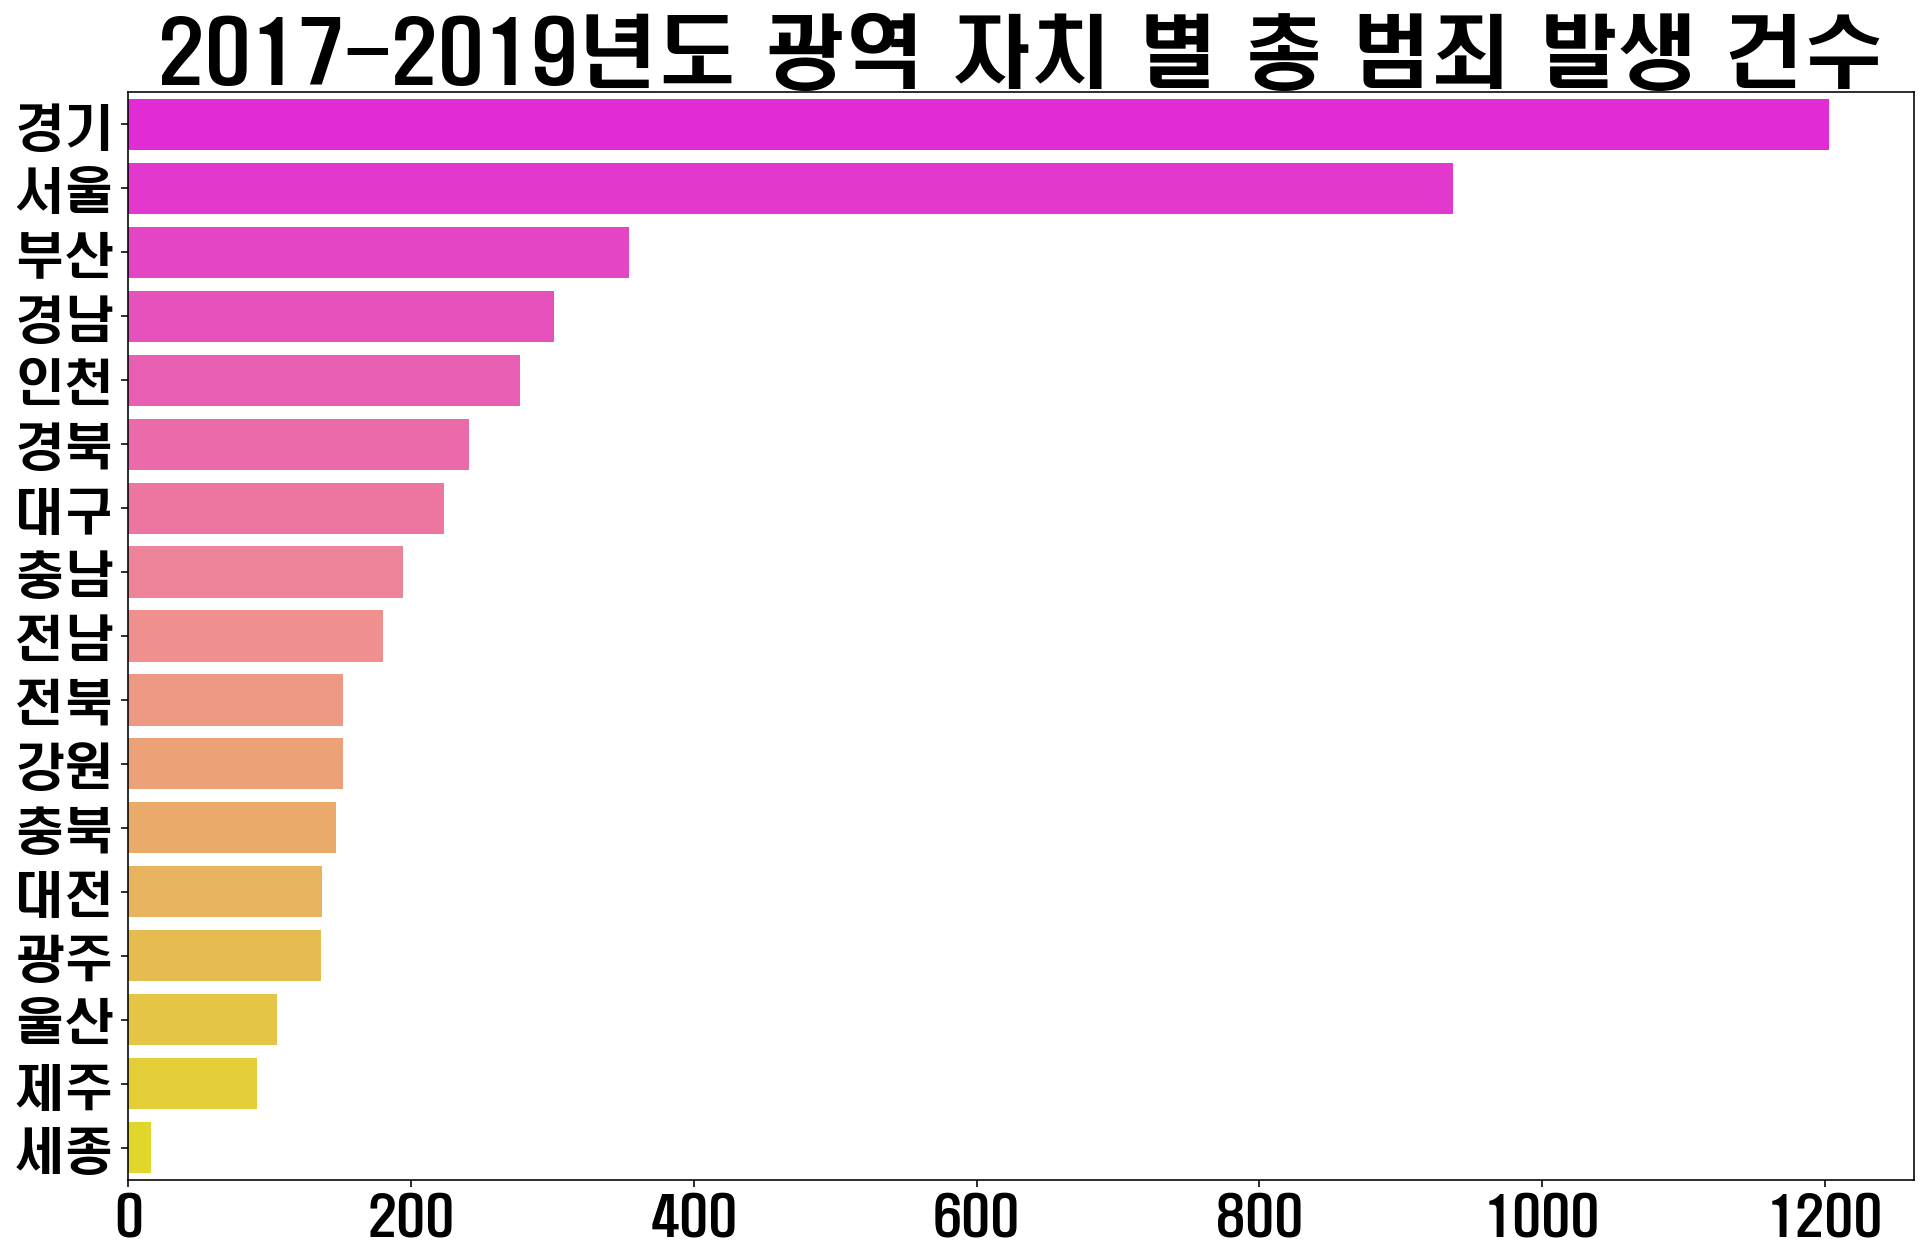

In [51]:
import matplotlib.patches as mpatches
plt.figure(figsize=(16,10))
plt.title('2017-2019년도 광역 자치 별 총 범죄 발생 건수', fontsize=40)
test= dataset.groupby('광역자치')['전체발생건수'].sum().reset_index().sort_values(by='전체발생건수', ascending=False)
test['천건당'] = round(test['전체발생건수']/1000)
ax=sns.barplot(x="천건당", y="광역자치", data=test , ci=None,estimator=np.sum, palette='spring')
ax.set(ylabel='', xlabel='')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.rc('font', size=25)

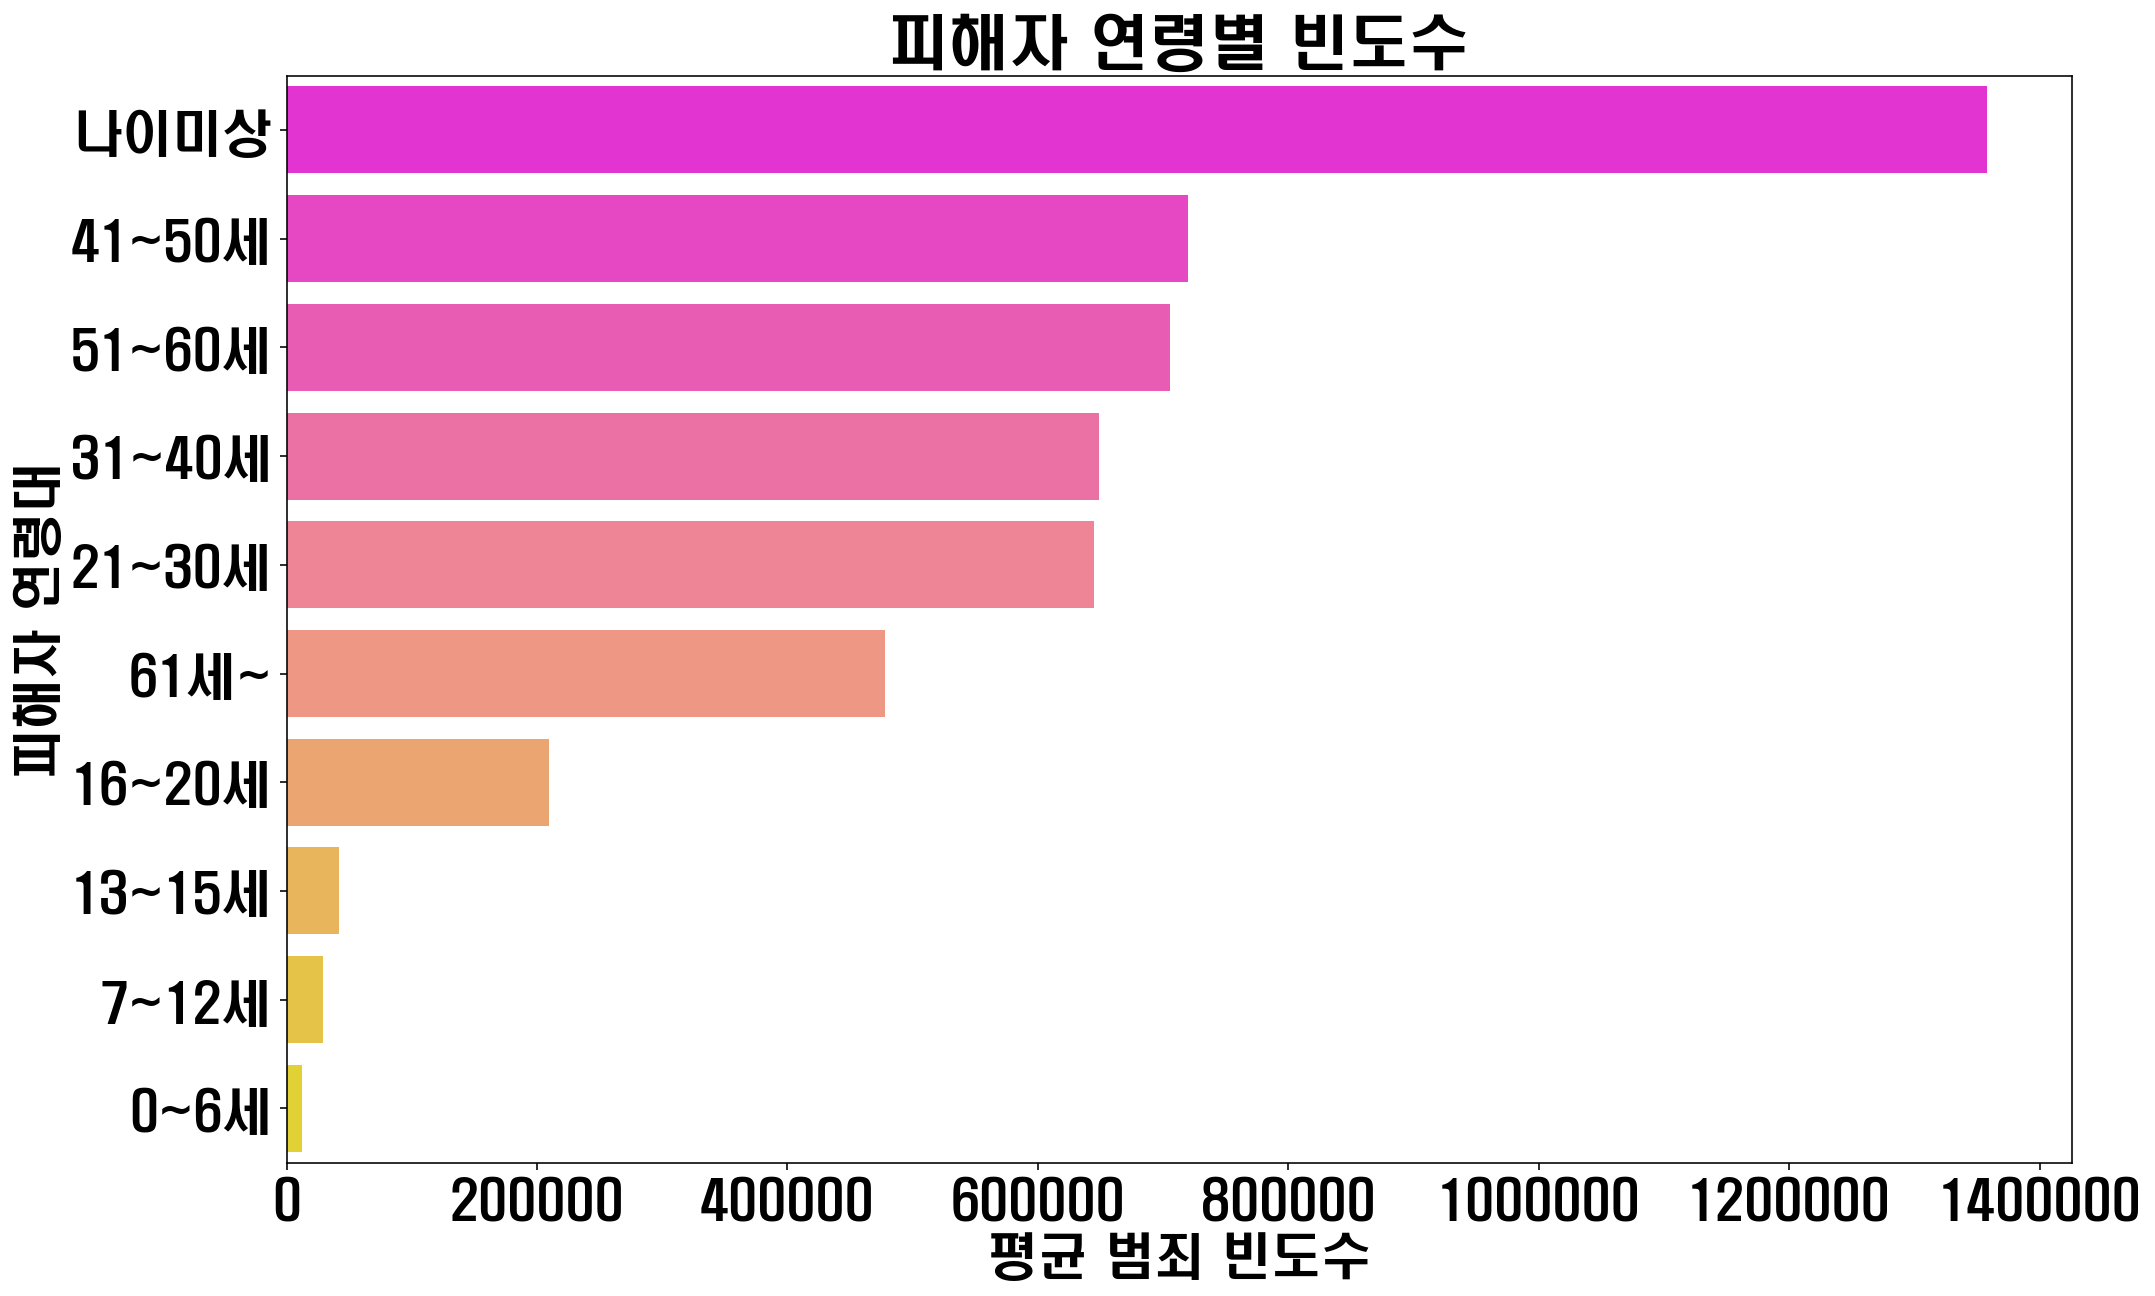

In [99]:
plt.figure(figsize=(16,10))
plt.title('피해자 연령별 빈도수')
test1= dataset.iloc[:,6:16].sum().reset_index().sort_values(by=0, ascending=False)
ax=sns.barplot(x=0, y="index", data=test1 , ci=None,estimator=np.sum, palette='spring')
ax.set(xlabel='평균 범죄 빈도수', ylabel='피해자 연령대')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.rc('font', size=25)

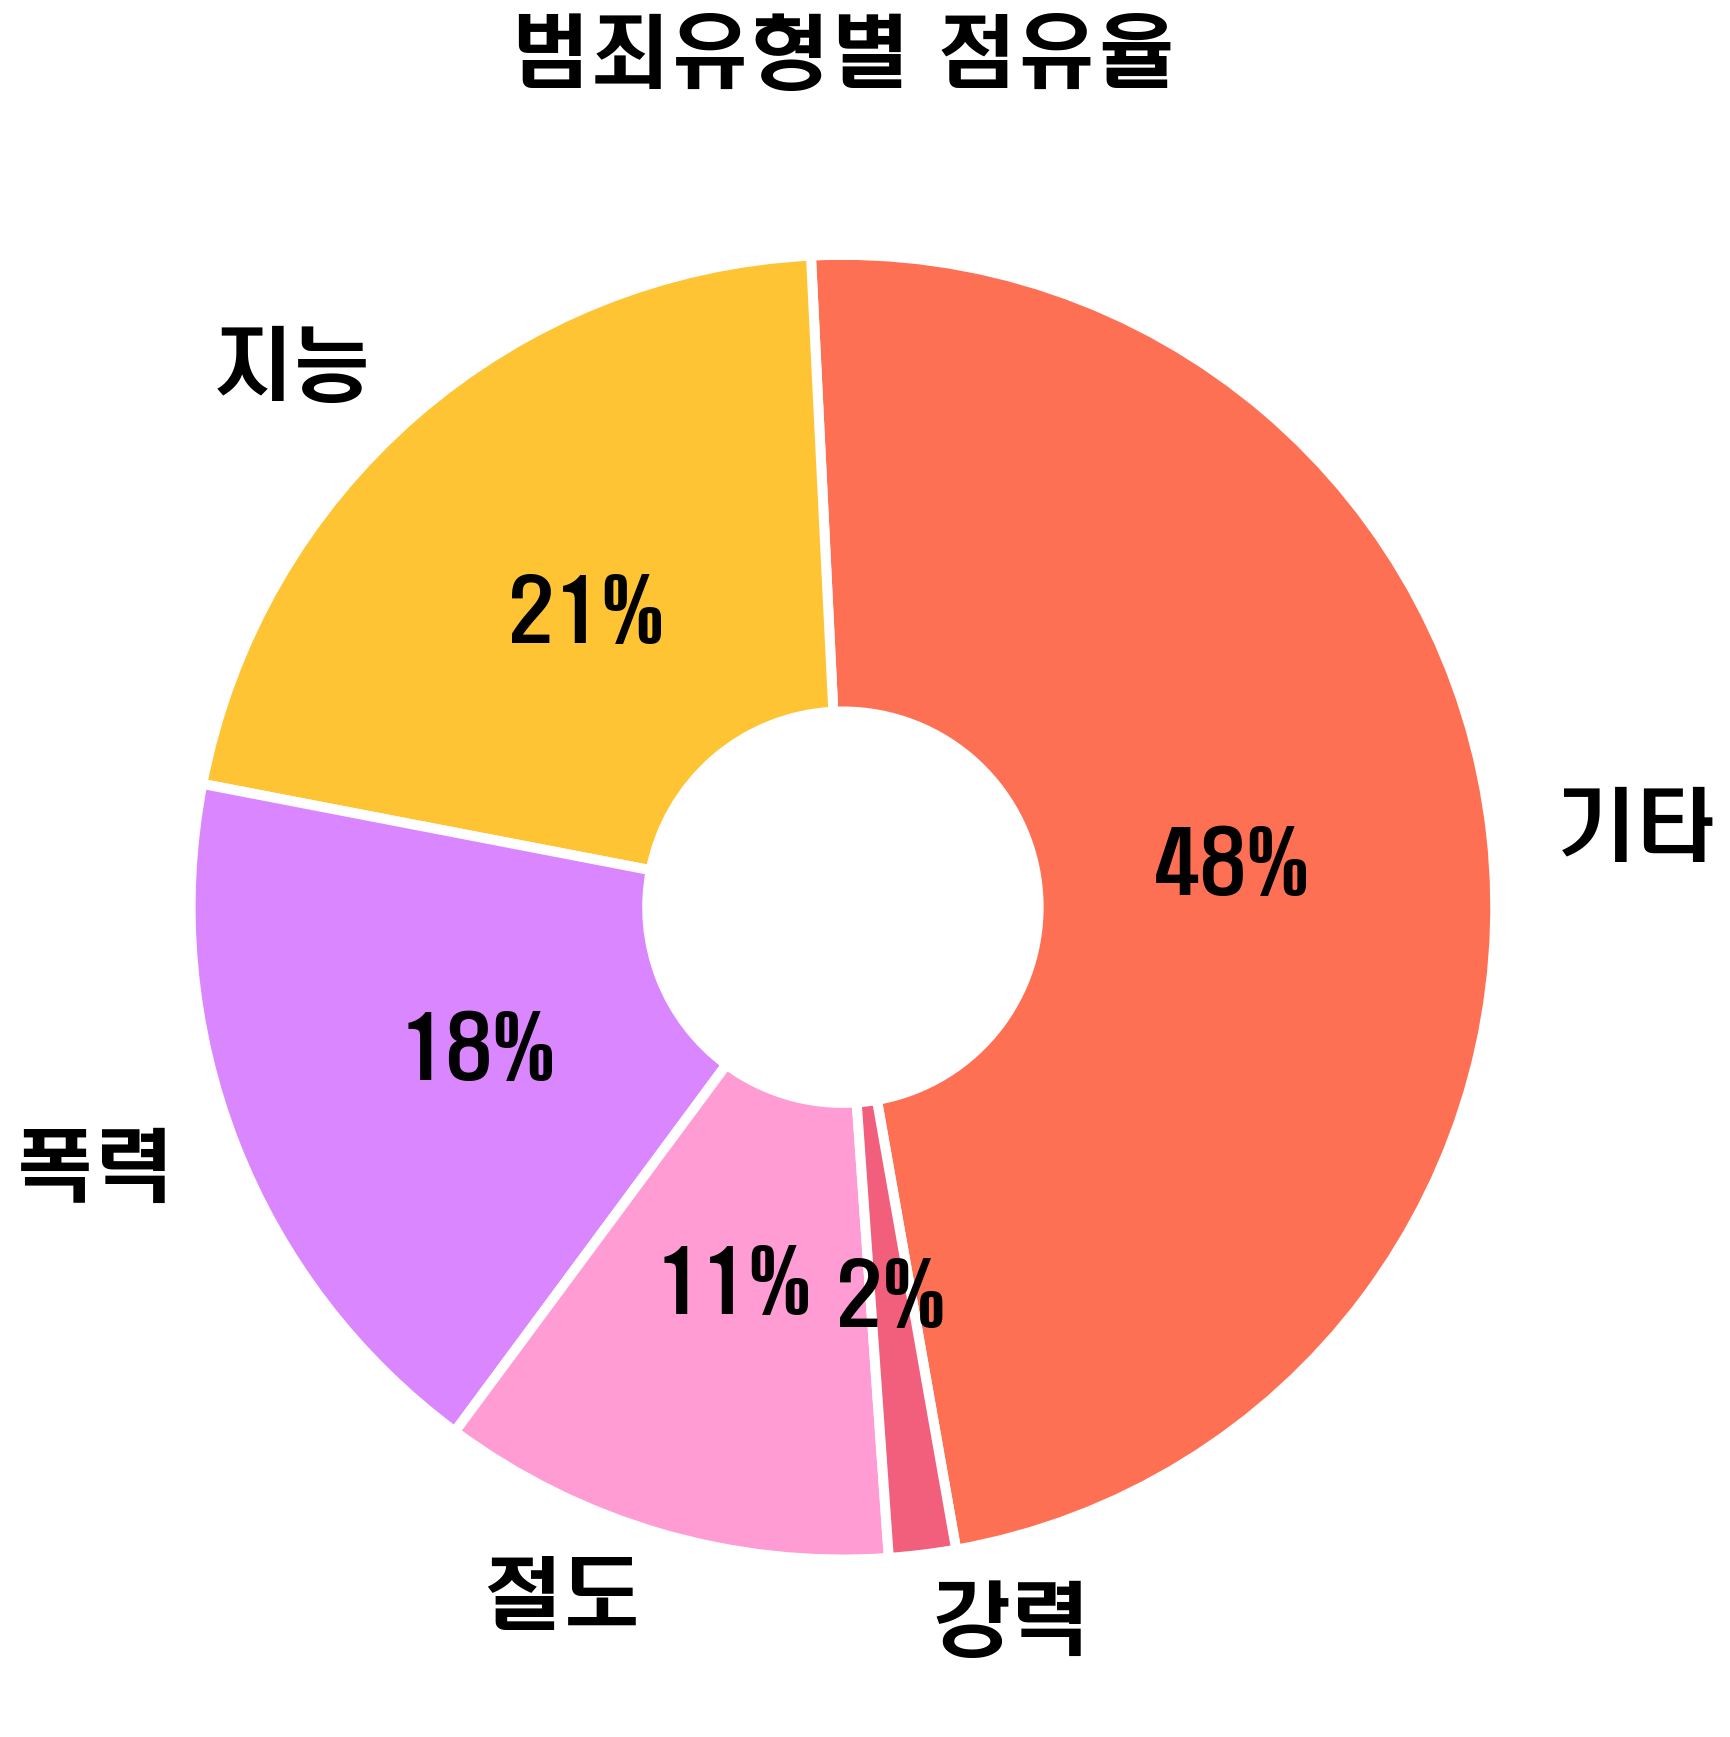

In [66]:
test2= dataset.iloc[:,16:21].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,15))
plt.title('범죄유형별 점유율', fontsize=40)
colors = ['#fe7054', '#fec434', '#da87ff', '#ff9cd3', '#f25f7d']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(x=test2[0], labels=test2.index, autopct='%1.f%%', data=test2 ,startangle=280, 
        colors=colors, wedgeprops=wedgeprops)
plt.rc('font', size=40)
plt.show()

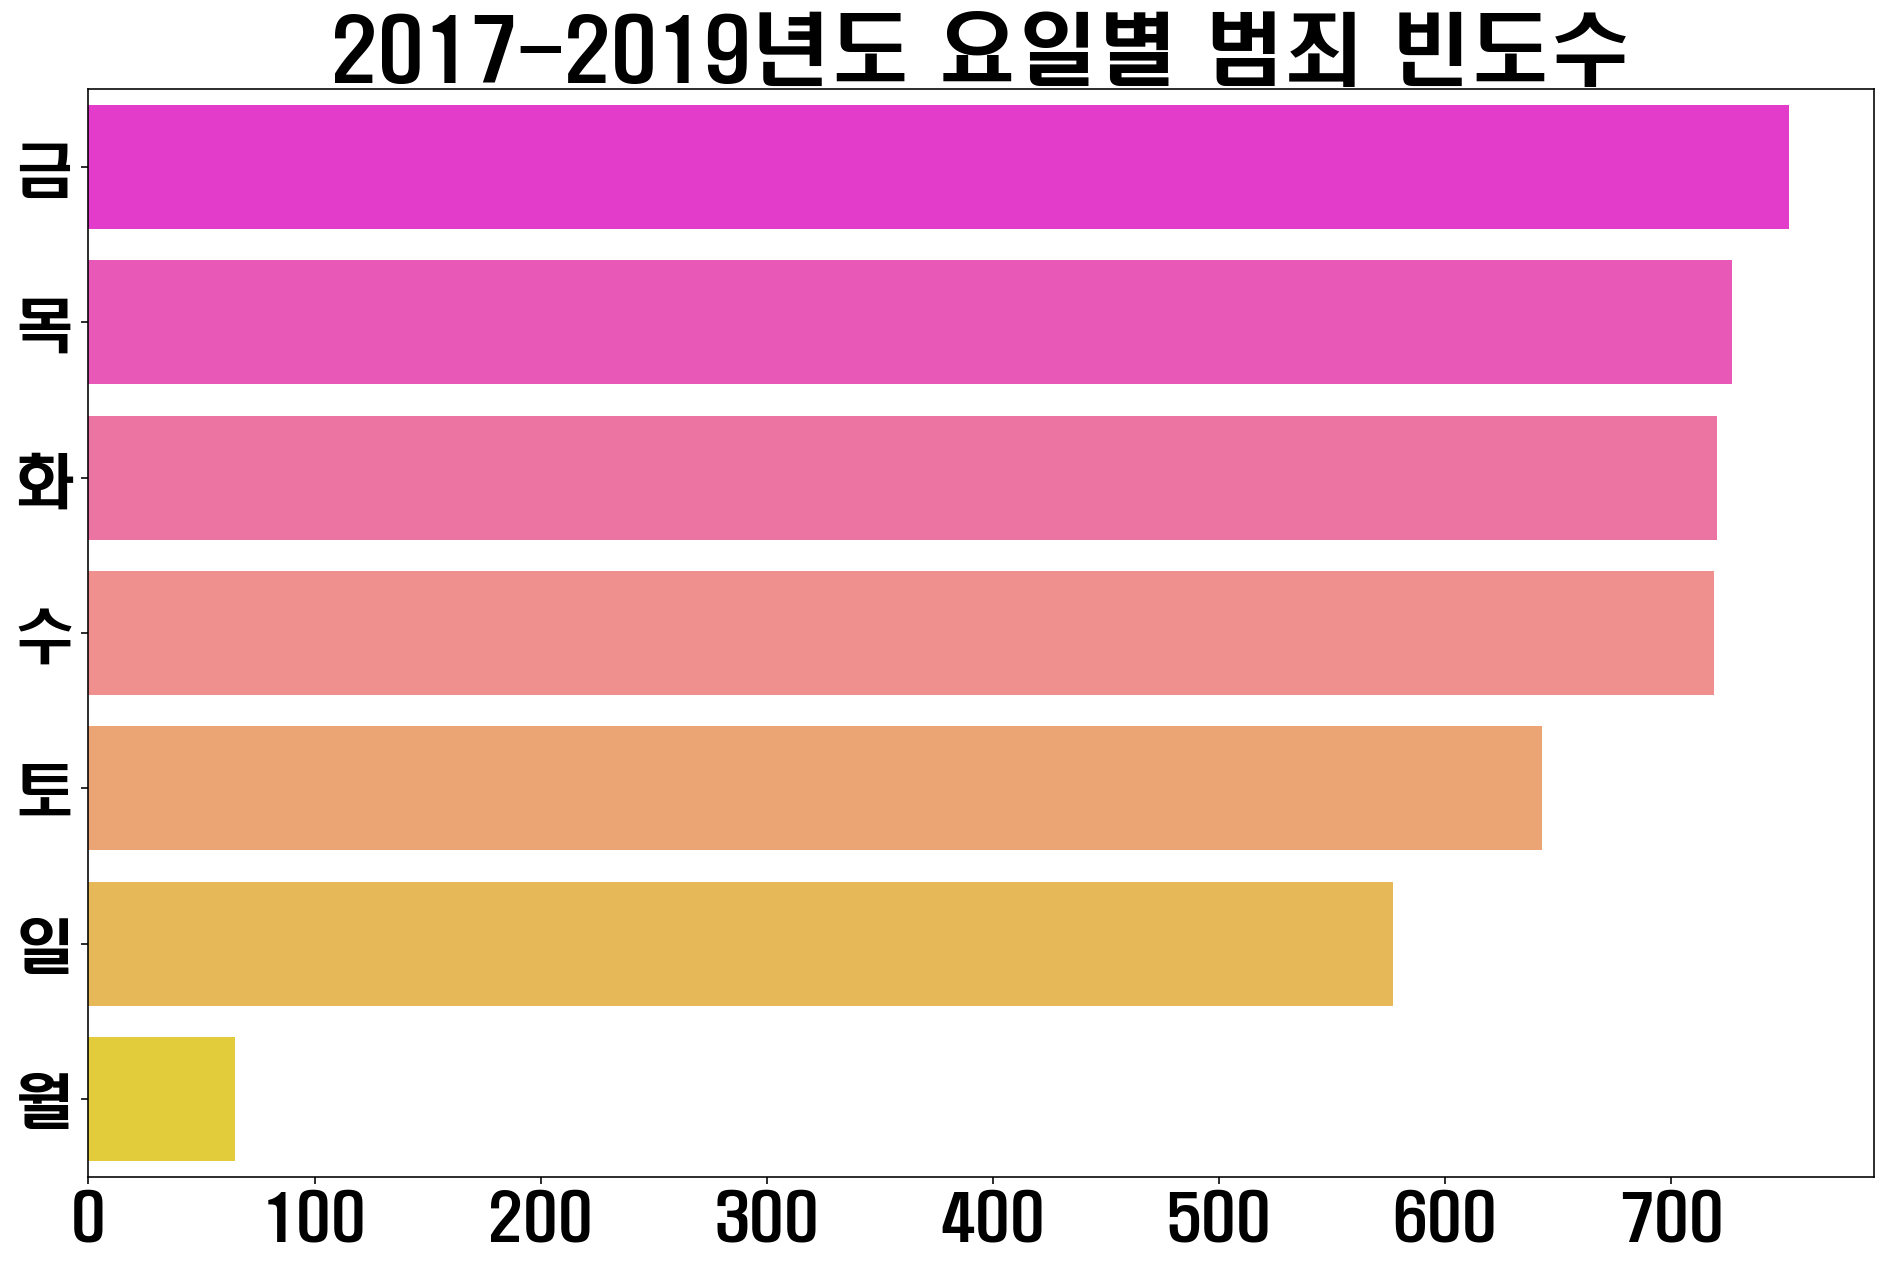

In [73]:
day_data= dataset.iloc[:,21:28].sum().sort_values(ascending=False).reset_index()
day_data['천건당'] = round(day_data[0]/1000)
plt.figure(figsize=(16,10))
plt.title('2017-2019년도 요일별 범죄 빈도수', fontsize=40)
ax=sns.barplot(x='천건당', y='index', data=day_data, palette='spring')
ax.set(xlabel='', ylabel='')
plt.rc('font', size=25)
plt.show()

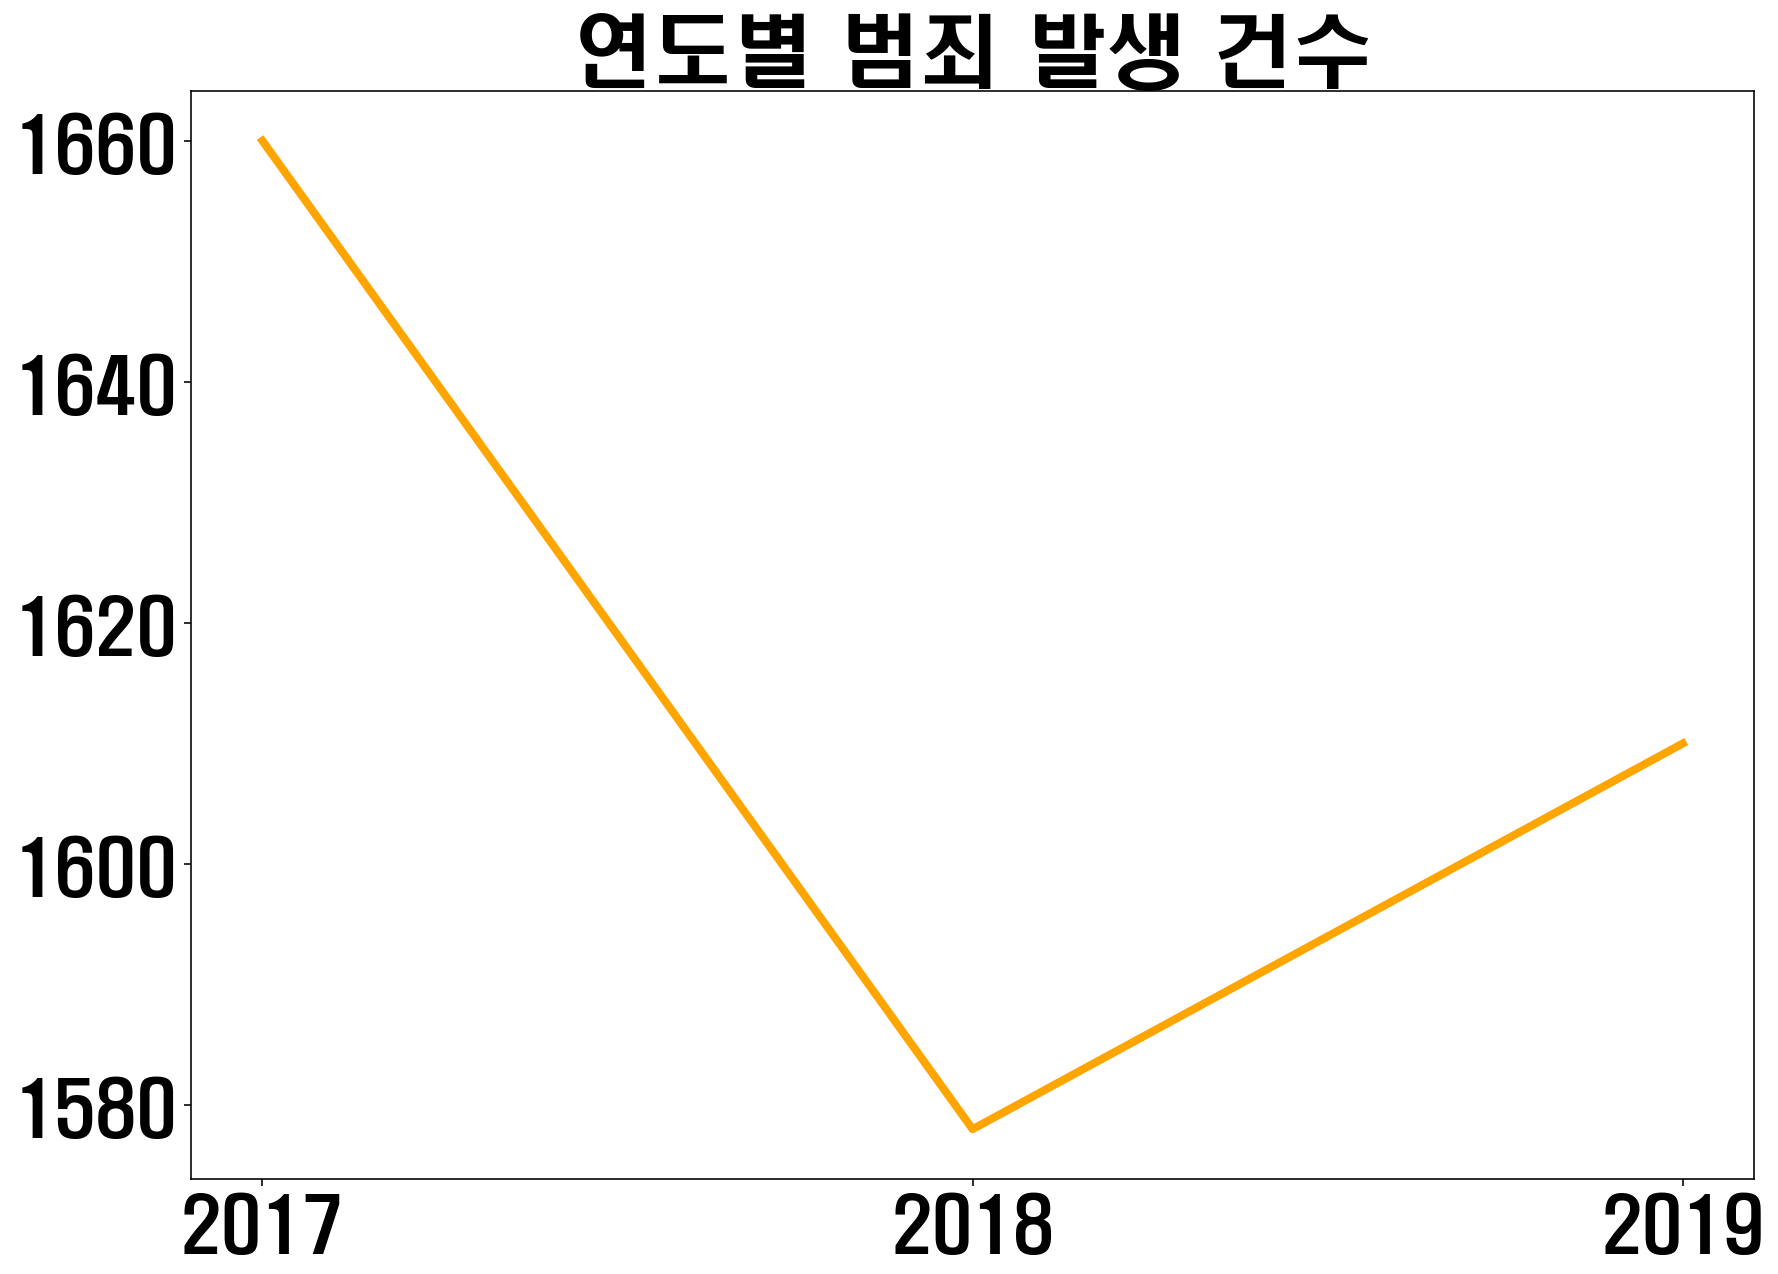

In [102]:
plt.figure(figsize=(14,10))
tmp = dataset.groupby('년도')['전체발생건수'].sum().reset_index()
tmp['천건당'] = round(tmp['전체발생건수']/1000)
ax=sns.lineplot(x= '년도', y= '천건당', data= tmp, color='orange', linewidth=4)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.title('연도별 범죄 발생 건수', size=40)
ax.set(xlabel='', ylabel='')
plt.rc('font', size=25)
plt.show()

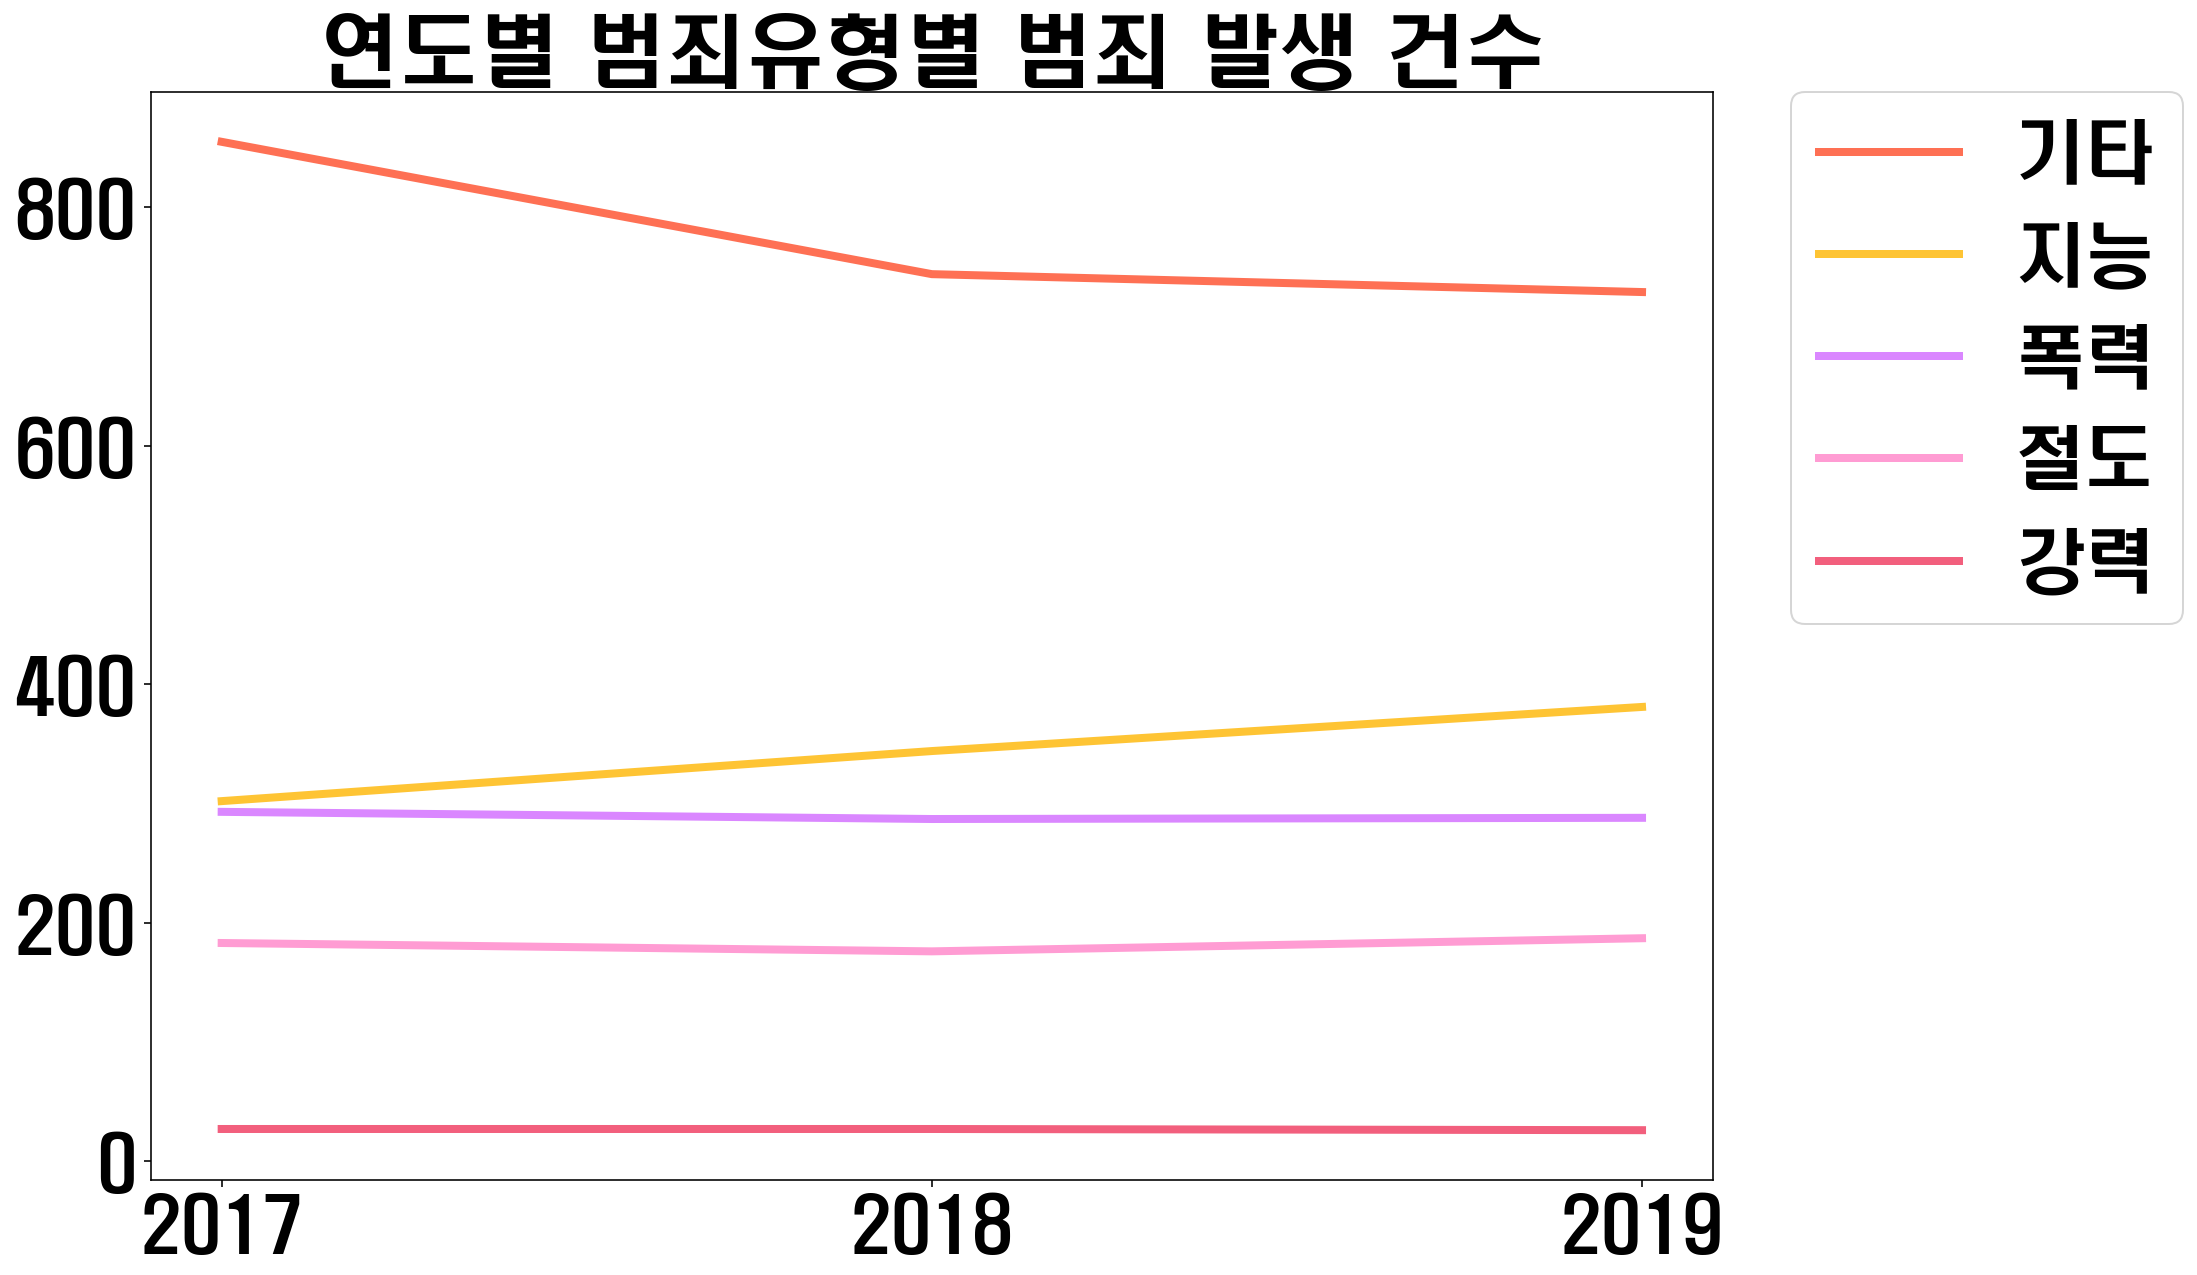

In [101]:
test3 = dataset.groupby('년도')
plt.figure(figsize=(14,10))
plt.plot(test3['기타'].sum().index, round(test3['기타'].sum()/1000), label='기타', color='#fe7054', linewidth=4)
plt.plot(test3['지능'].sum().index, round(test3['지능'].sum()/1000), label='지능',color='#fec434',linewidth=4)
plt.plot(test3['폭력'].sum().index, round(test3['폭력'].sum()/1000), label='폭력',color='#da87ff',linewidth=4)
plt.plot(test3['절도'].sum().index, round(test3['절도'].sum()/1000), label='절도',color='#ff9cd3',linewidth=4)
plt.plot(test3['강력'].sum().index, round(test3['강력'].sum()/1000), label='강력',color='#f25f7d',linewidth=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('연도별 범죄유형별 범죄 발생 건수', fontsize=40)
plt.rc('font', size=35)
plt.show()

In [117]:
# 지도시각화

In [63]:
def area_map(x):
    if(x=='강원'):
        return '강원도'
    elif(x=='경기'):
        return '경기도'
    elif(x=='경남'):
        return '경상남도'
    elif(x=='경북'):
        return '경상북도'
    elif(x=='광주'):
        return '광주광역시'
    elif(x=='전북'):
        return'전라북도'
    elif(x=='전남'):
        return'전라남도'
    elif(x=='대구'):
        return'대구광역시'
    elif(x=='대전'):
        return'대전광역시'
    elif(x=='충남'):
        return'충청남도'
    elif(x=='부산'):
        return'부산광역시'
    elif(x=='제주'):
        return'제주특별자치도'
    elif(x=='서울'):
        return'서울특별시'
    elif(x=='울산'):
        return'울산광역시'
    elif(x=='인천'):
        return'인천광역시'
    elif(x=='충북'):
        return'충청북도'
    elif(x=='세종'):
        return'세종특별자치시'


In [64]:
test4= dataset.groupby('광역자치')['전체발생건수'].sum().reset_index()
test4['범죄율(%)'] = test4['전체발생건수'].map(lambda x: round(x/test4['전체발생건수'].sum()*100,1))
test4['CTPRVN_CD']= [42,41,48,47,29,27,30,26,11,36,31,28,46,45,50,44,43]
test4['위도']= [37.86120435,37.28334353,35.31097718,36.32650891,35.164633,35.78763339,36.36439807,35.21206884,37.56243647,36.47987269,35.53068256,37.46501233,34.85608388,35.79370693,33.38453062,36.51885751,36.79948018
]
test4['경도'] = [128.1374661,126.8812431,127.8083181,128.4376634,126.6991202,128.4642518,127.3828803,129.0374607,126.9383534,127.2874659,129.2910682,126.6585503,126.8916863,127.1328186,126.4822764,126.7769085,127.6039104
]

In [65]:
test4['광역자치']=test4['광역자치'].apply(area_map)

In [66]:
geo_json ='https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json'

In [68]:
m=folium.Map(
    location=['36.3643980718602','127.382880272308'],
    tiles='OpenStreetMap',#'Stamen Terrain'
    zoom_start=7
) 
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=test4,
    columns=['광역자치','전체발생건수'],
    key_on='feature.properties.name',
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.5,
).add_to(m)

plugins.Fullscreen(position='topright',
                  title='Click to Expand',
                  title_cancel='Click to Exit',
                  force_seperate_button=True).add_to(m)

for i in range(len(test4['광역자치'])):
    lat= test4.loc[i, '위도']
    long= test4.loc[i,'경도']
    tooltip = '<h2>'+test4.loc[i, '광역자치']+'</h2>'+ \
        '<h3>'+'3년간 범죄 건수: '+str(test4.loc[i,'전체발생건수'])+'\n'+\
        '<br>'+' 전국 대비 범죄율: '+str(test4.loc[i,'범죄율(%)'])+'</h3>'
    folium.Marker([lat, long], tooltip=tooltip).add_to(m)
    
m.save('map.html')

## 지능범죄 분석

In [108]:
intellectualcrime = pd.read_excel(r'C:\Users\best\Desktop\팀플\data/지능범죄.xlsx')

In [109]:
intellectualcrime['연도'] = intellectualcrime['연도'].map(lambda x: str(x))

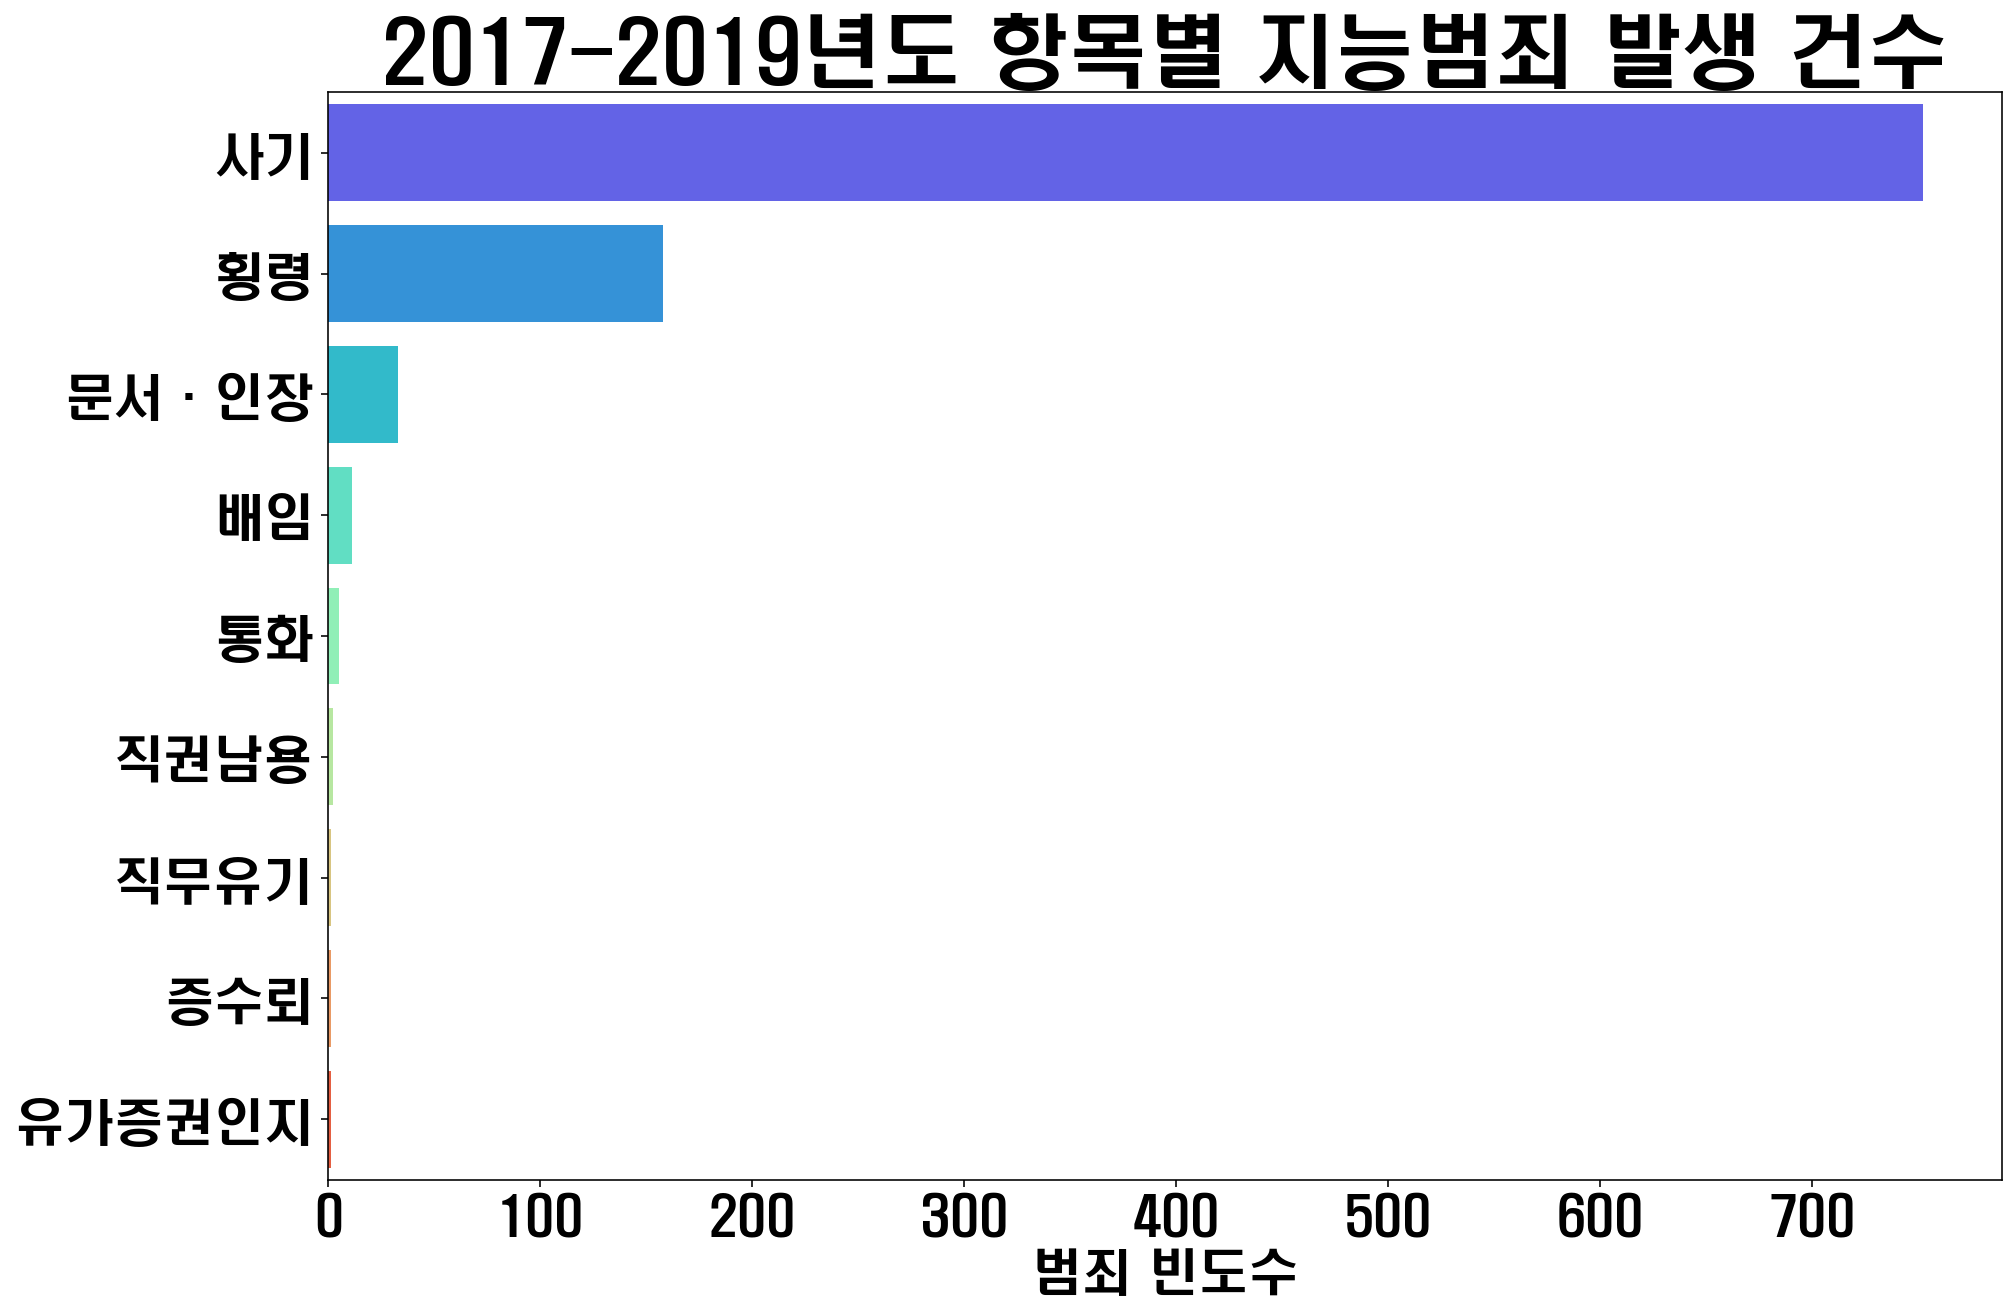

In [126]:
temp= intellectualcrime.iloc[:,1:10].sum().sort_values(ascending=False).reset_index()
temp['천건당']=round(temp[0]/1000)
plt.figure(figsize=(15,10))
plt.title('2017-2019년도 항목별 지능범죄 발생 건수', fontsize=40)
ax= sns.barplot(x='천건당', y='index' , data=temp, estimator=np.sum, palette='rainbow')
ax.set(xlabel='범죄 빈도수', ylabel='')
plt.rc('font', size=25)
plt.show()

연도
2017    218.0
2018    252.0
2019    282.0
Name: 사기, dtype: float64

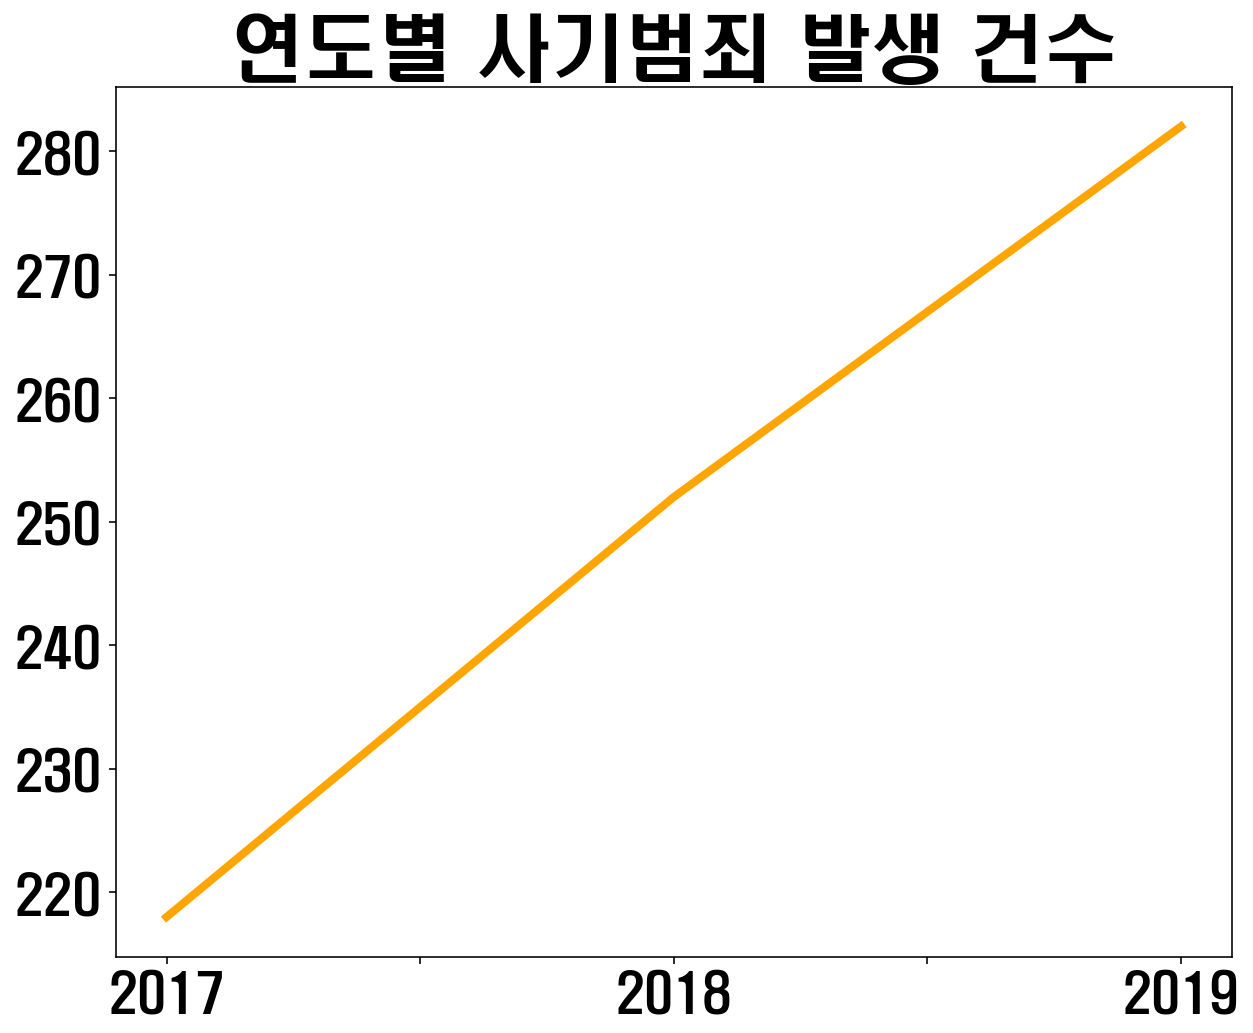

In [139]:
plt.figure(figsize=(10,8))
round(intellectualcrime.groupby('연도')['사기'].sum()/1000).plot(color='orange', linewidth=4)
plt.title('연도별 사기범죄 발생 건수', fontsize=37)
plt.xlabel('')
plt.rc('font', size=25)
plt.show()

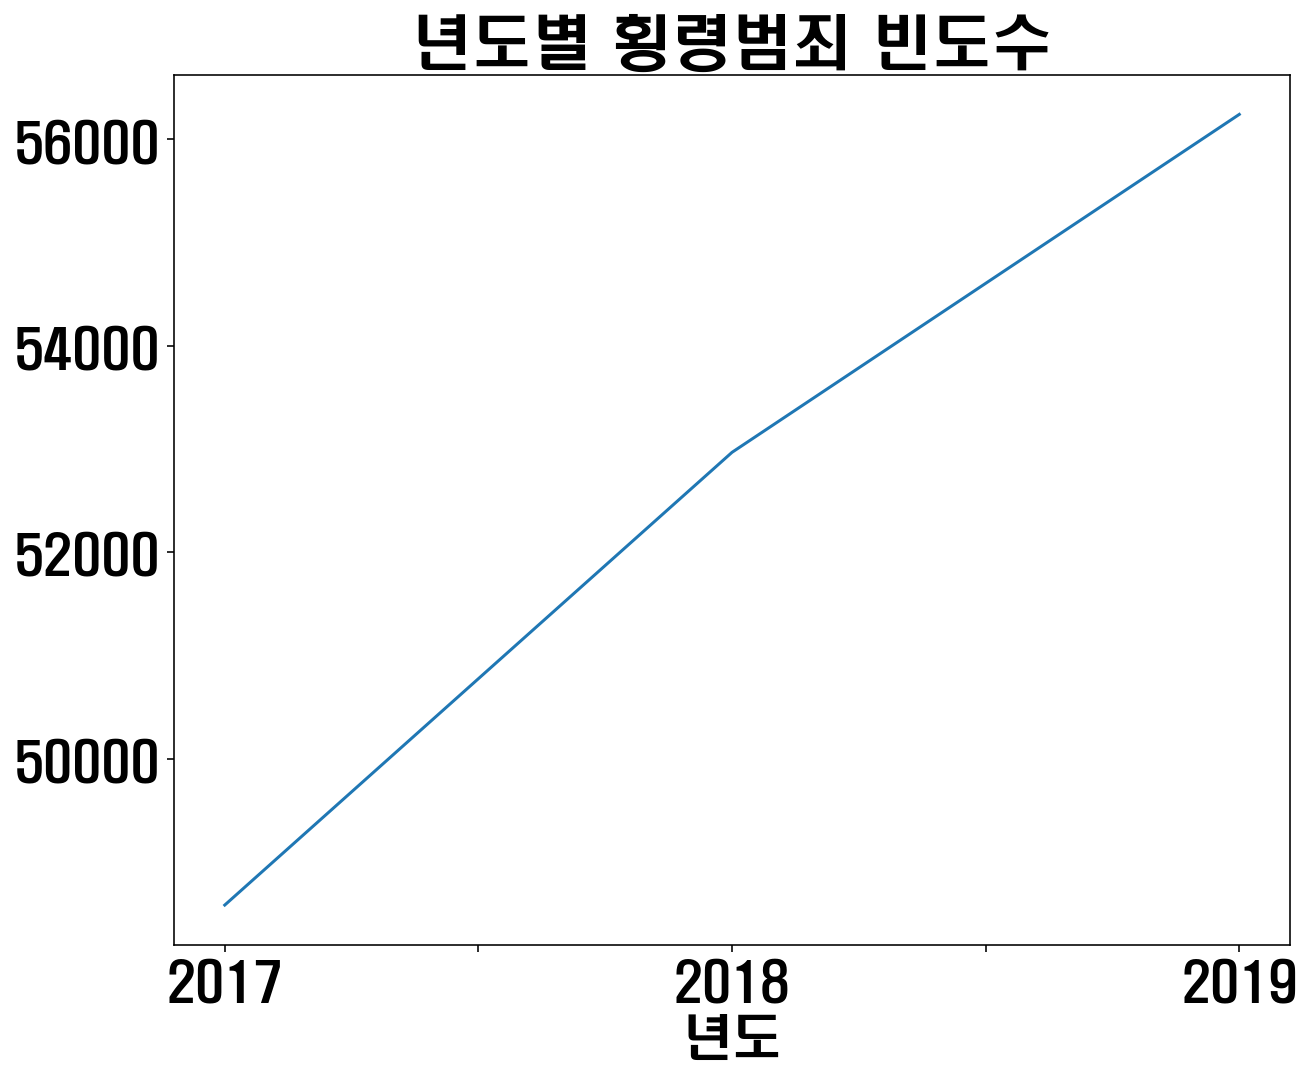

In [86]:
plt.figure(figsize=(10,8))
intellectualcrime.groupby('연도')['횡령'].sum().plot()
plt.xlabel('년도')
plt.title('년도별 횡령범죄 빈도수')
plt.show()

## 사기범죄 분석

In [141]:
fraudcrime = pd.read_csv(r'C:\Users\best\Desktop\팀플\data/사기통계.csv', encoding='cp949')

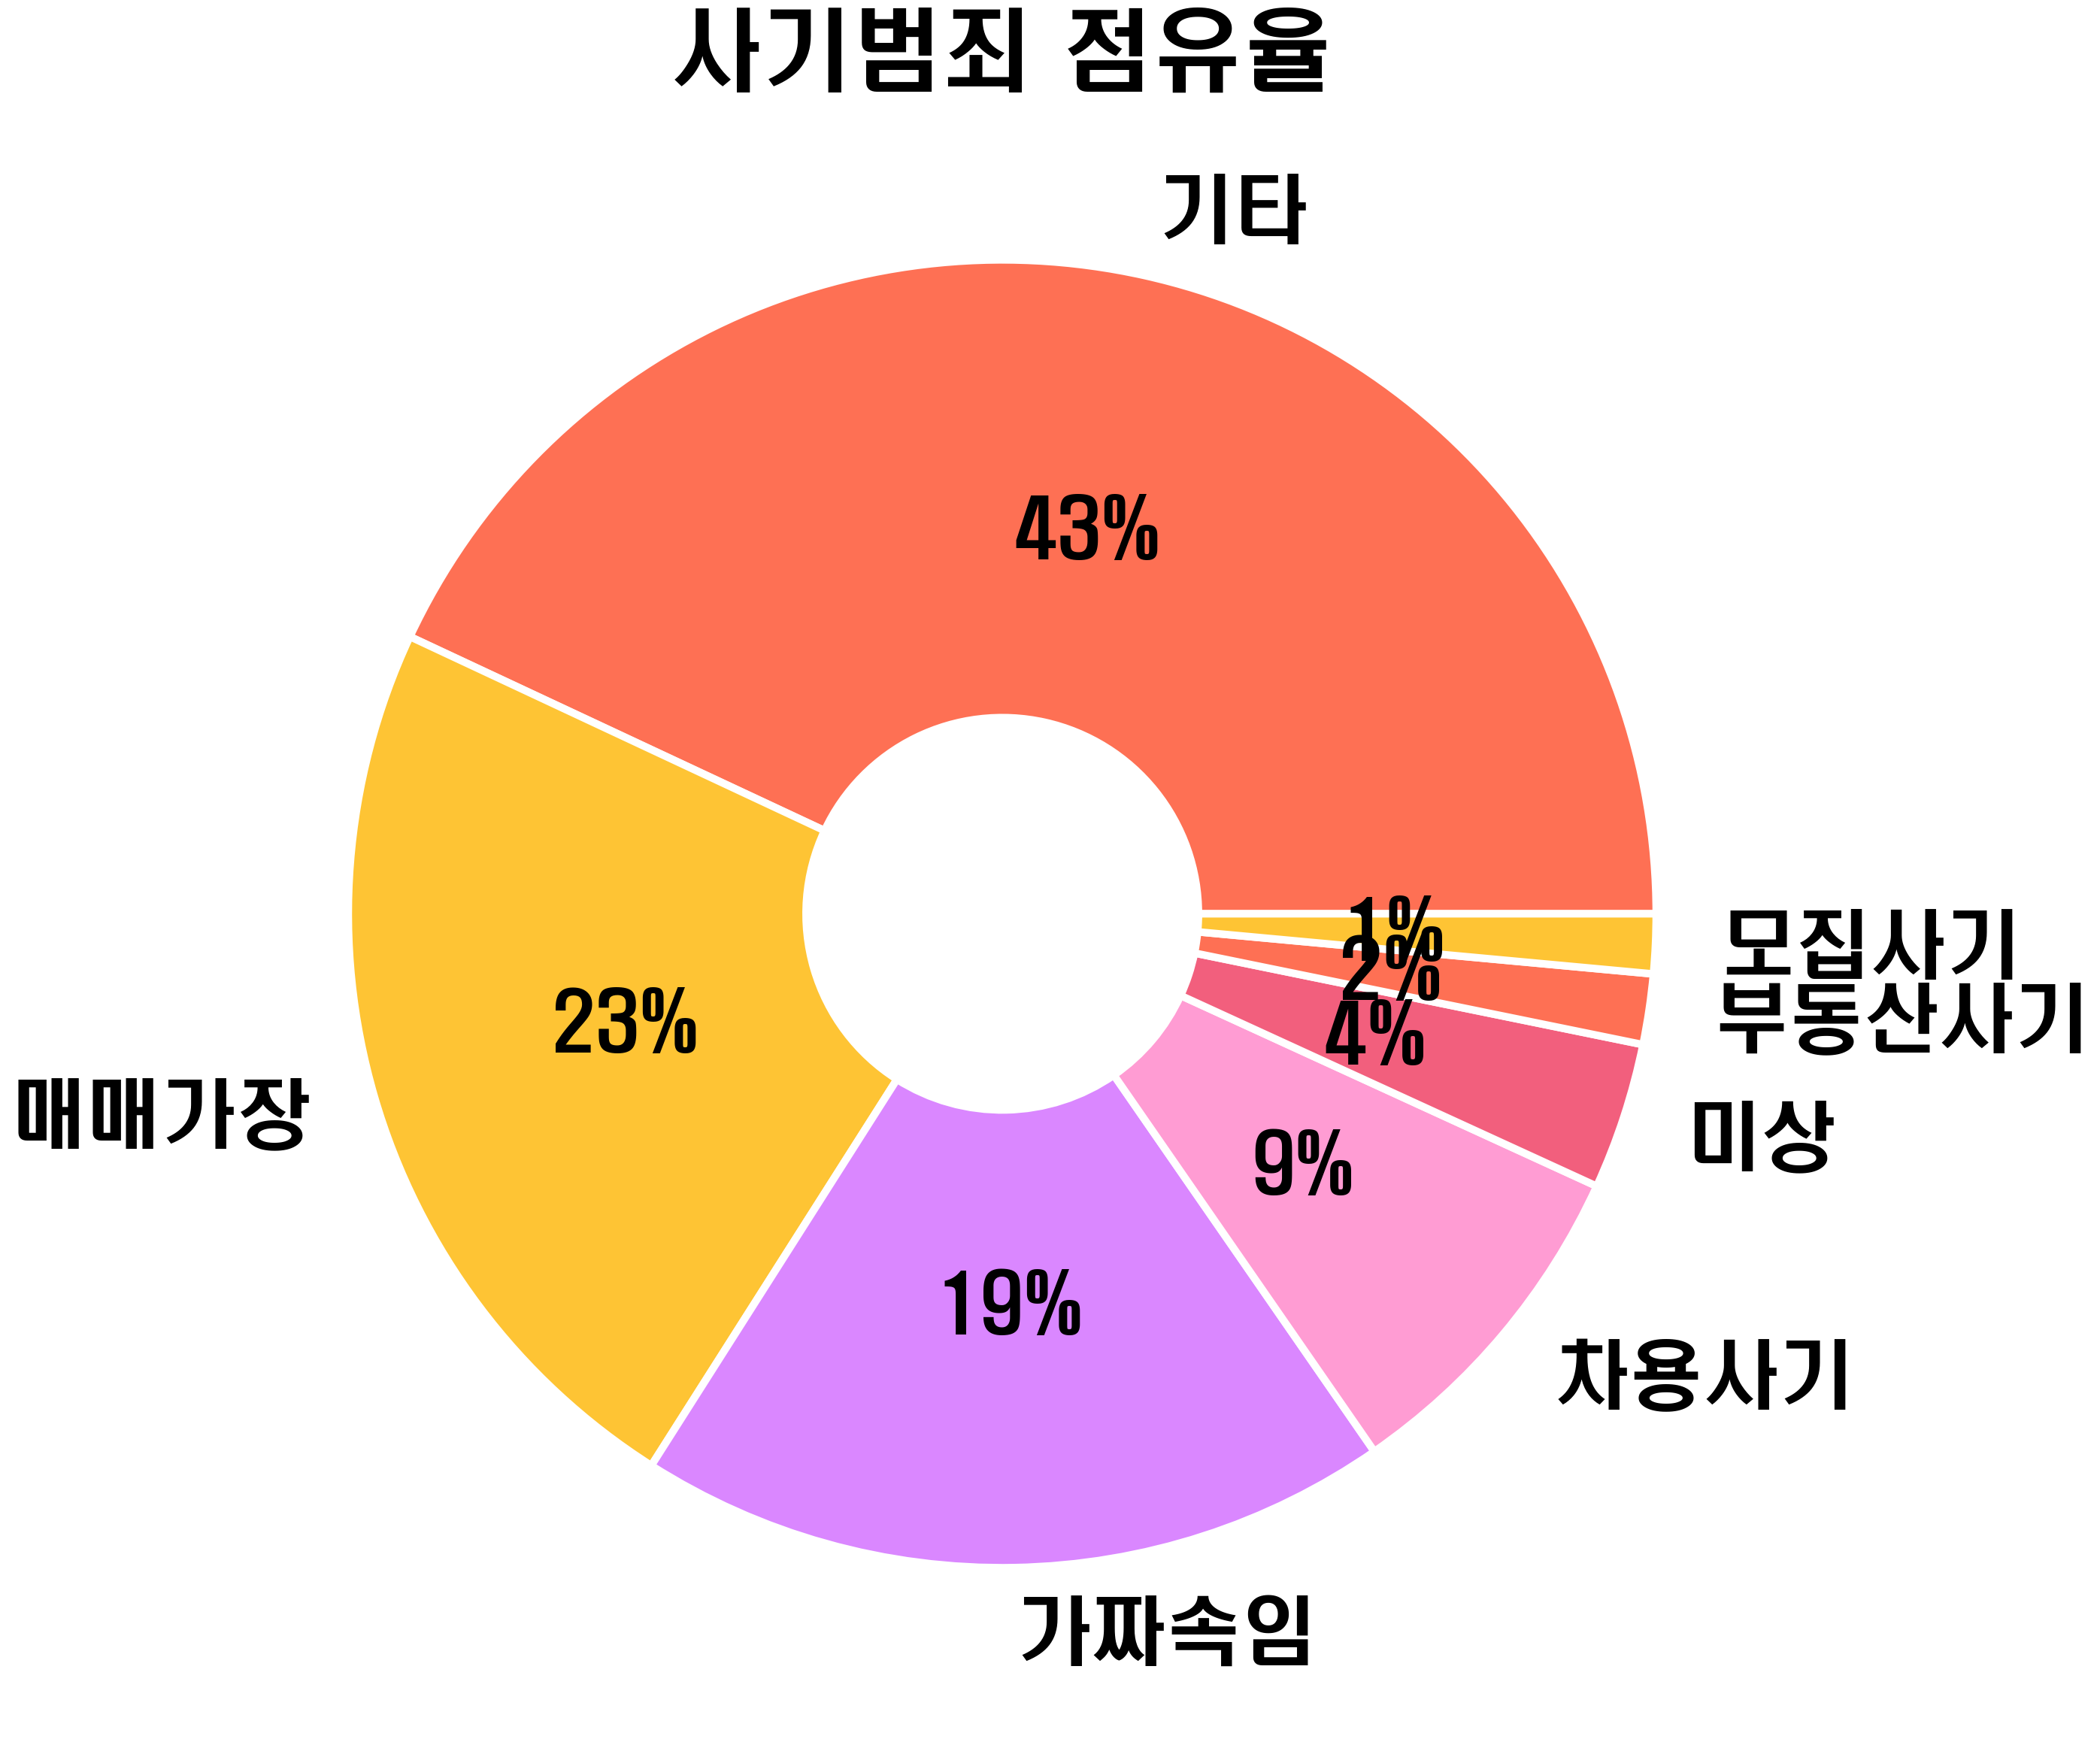

In [152]:
insert= fraudcrime.iloc[:,:-1].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(20,20))
plt.title('사기범죄 점유율', fontsize=60)
explode = [0.025, 0.025, 0.025, 0.025,0.025, 0.025, 0.025]
colors = ['#fe7054', '#fec434', '#da87ff', '#ff9cd3', '#f25f7d']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(x= insert, labels=insert.index, data=insert, autopct='%1.f%%',  startangle=360,
       colors=colors, wedgeprops=wedgeprops)
plt.rc('font', size=50)
plt.show()

In [154]:
internetcrime= pd.read_csv(r'C:\Users\best\Desktop\팀플\data/인터넷사기현황.csv', encoding='cp949')

In [156]:
internetcrime.iloc[:,[0,3,1,2,4]]

,연도,게임,직거래,쇼핑몰,이메일 무역사기
0,2019,180499,151916,89797,7687
1,2018,149604,123677,74044,9380
2,2017,131734,107271,67589,7227


In [182]:
round(internetcrime.iloc[:,[0,3,1,2,4]].groupby('연도').sum()/1000)

,게임,직거래,쇼핑몰,이메일 무역사기
연도,,,,
2017,132.0,107.0,68.0,7.0
2018,150.0,124.0,74.0,9.0
2019,180.0,152.0,90.0,8.0


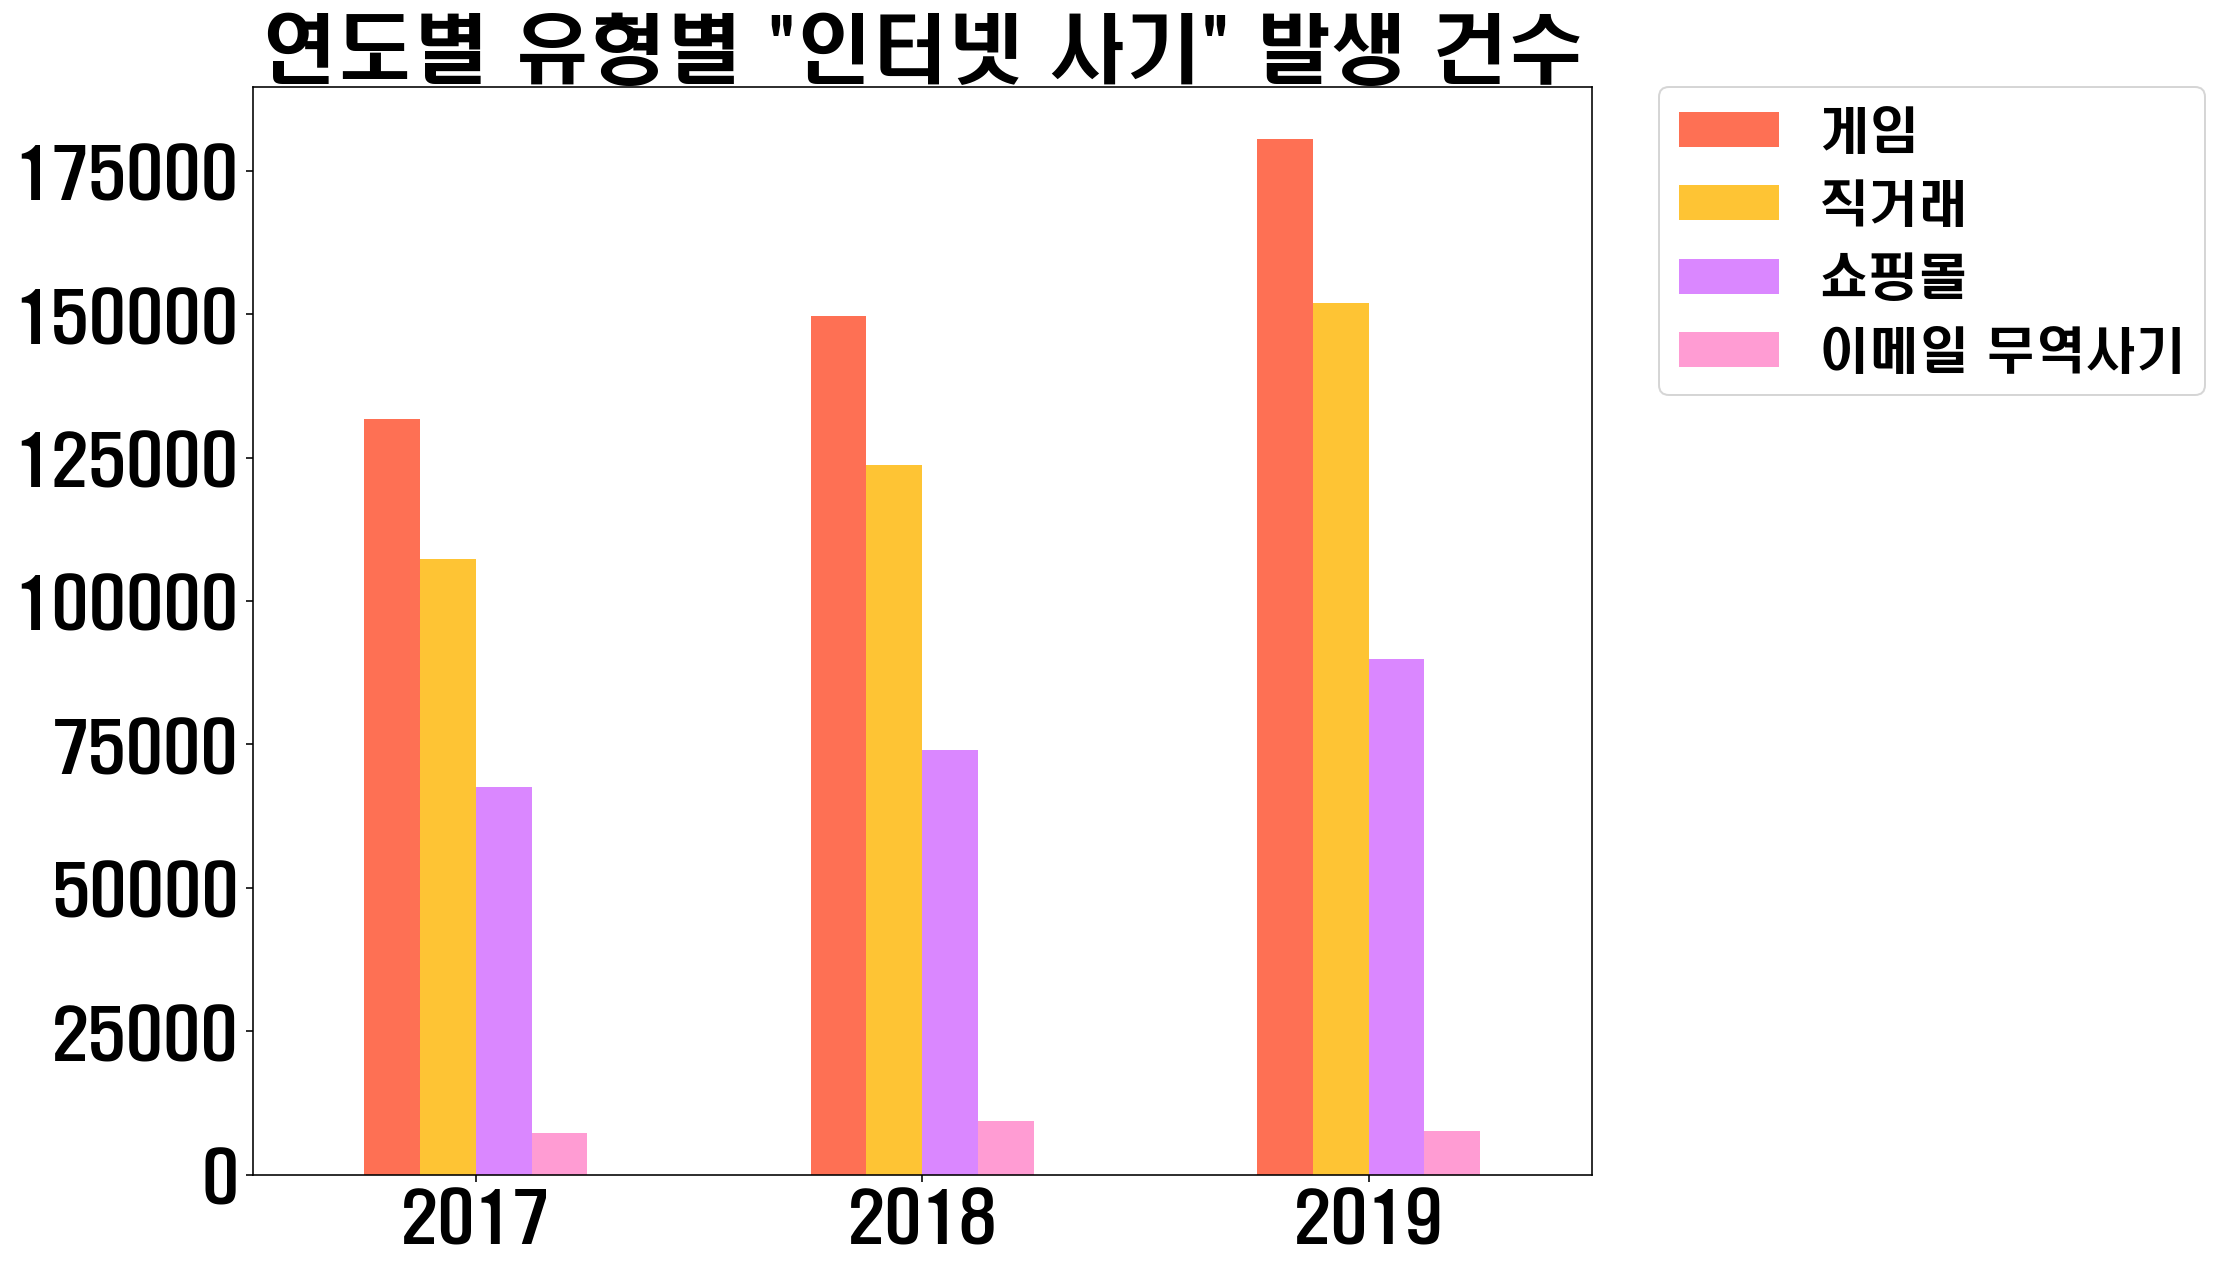

In [199]:
internetcrime.iloc[:,[0,3,1,2,4]].groupby('연도').sum().plot(kind='bar', figsize=(12,10), 
                                                           fontsize=32,color=['#fe7054', '#fec434', '#da87ff', '#ff9cd3'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=25)
plt.title('연도별 유형별 "인터넷 사기" 발생 건수', fontsize=38)
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()

In [186]:
phonecrime = pd.read_csv(r'C:\Users\best\Desktop\팀플\data/보이스범죄통계.csv', encoding='cp949')

In [187]:
phonecrime.columns = ['년도','기관사칭형','대출사기형']

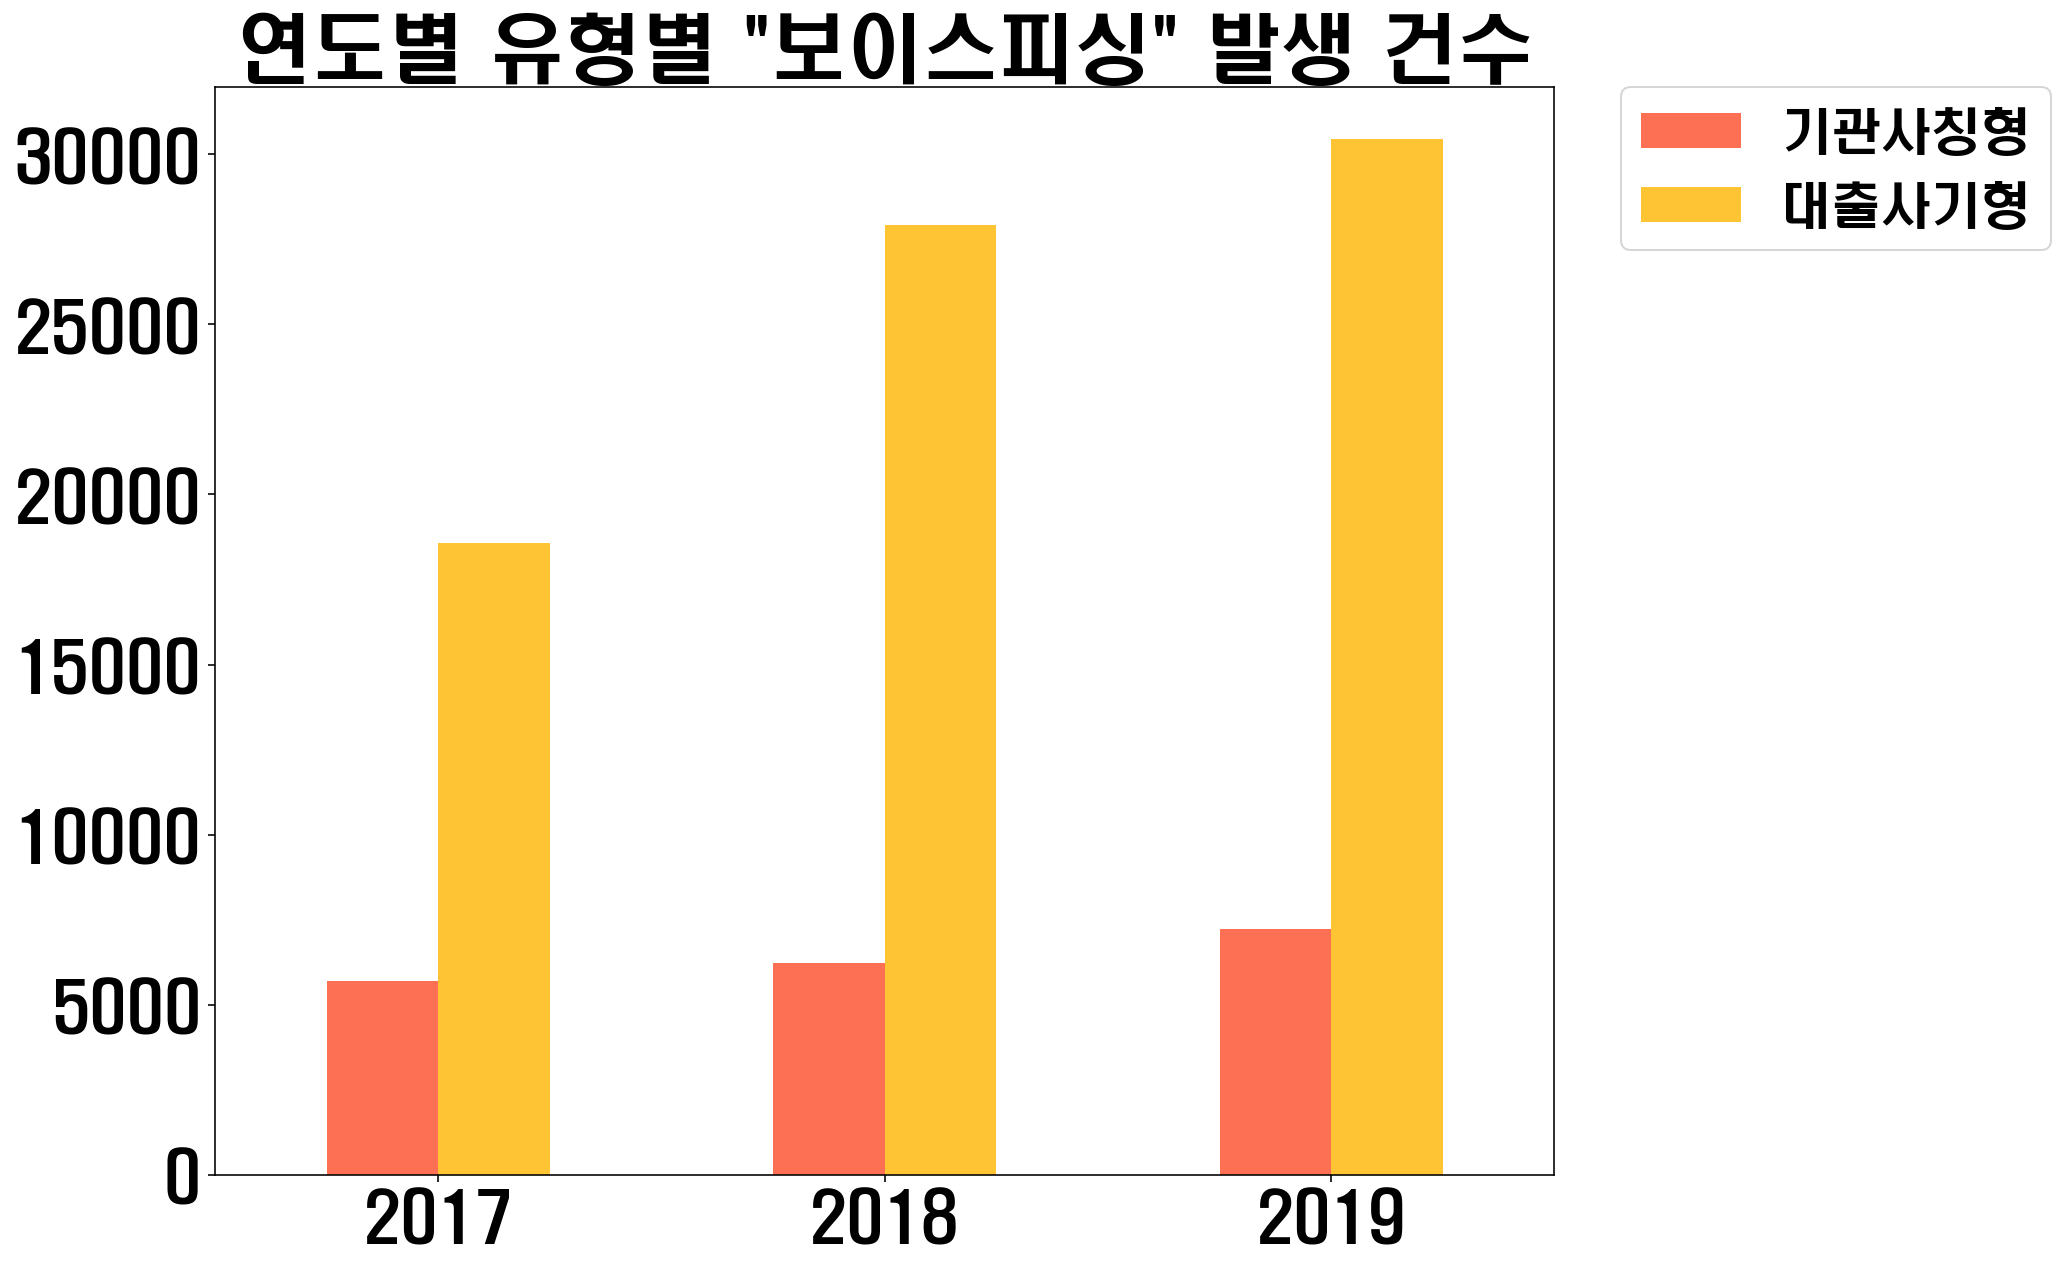

In [202]:
phonecrime.groupby('년도').sum().plot(kind='bar', figsize=(12,10),
                                   fontsize=32,color=['#fe7054', '#fec434', '#da87ff', '#ff9cd3'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=25)
plt.title('연도별 유형별 "보이스피싱" 발생 건수', fontsize=38)
plt.xticks(rotation=0)
plt.xlabel('')
plt.show()

## 기타범죄 분석

In [204]:
othercrime= pd.read_excel(r'C:\Users\best\Desktop\팀플\data/기타범죄.xlsx')

In [205]:
othercrime['연도'] = othercrime['연도'].map(lambda x:str(x))
othercrime.columns = ['광역자치', '성풍속', '도박', '특별경제', '마약', '보건', '환경', '교통',
       '노동', '안보', '선거', '병역', '기타', '년도']

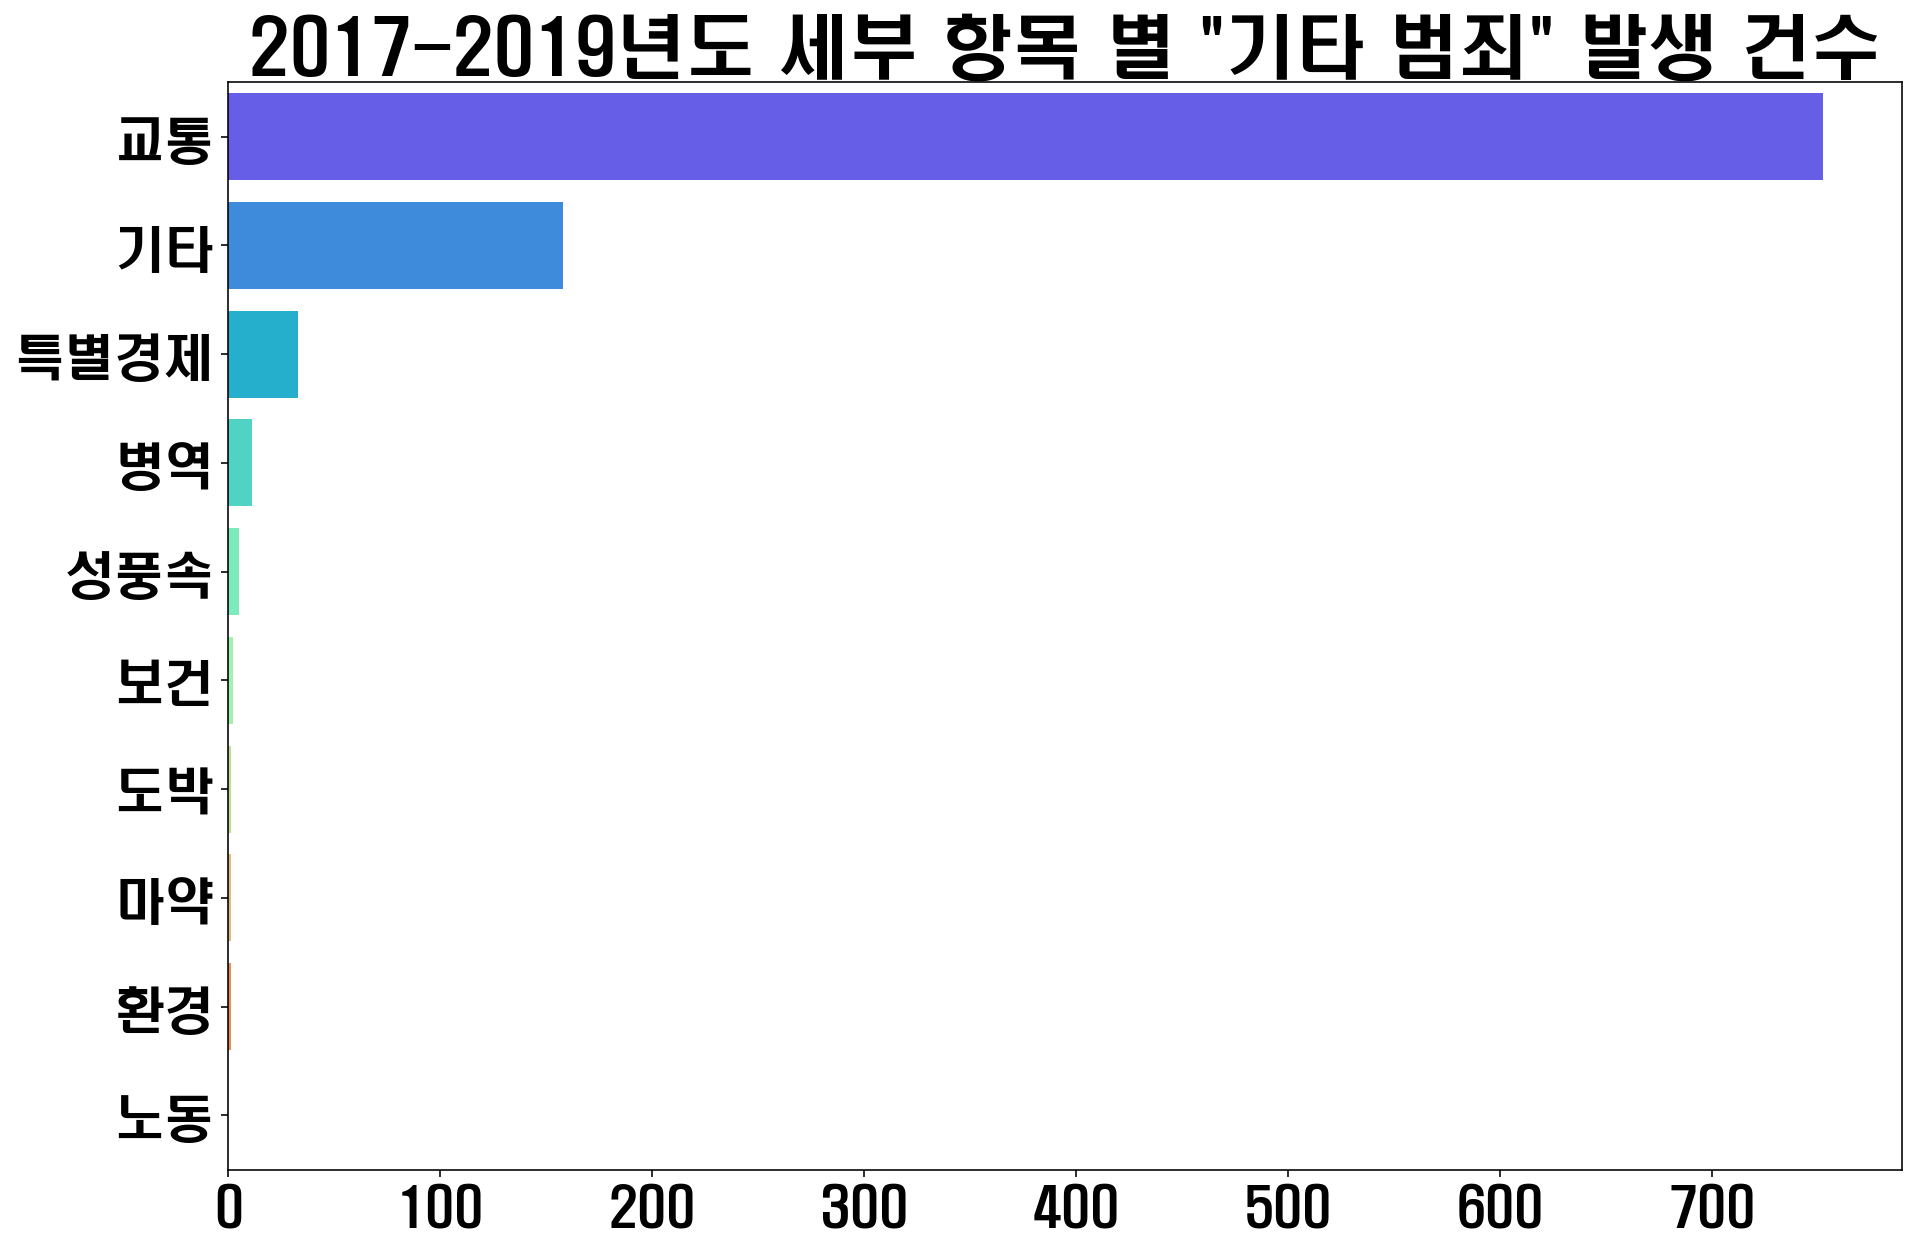

In [219]:
plt.figure(figsize=(15,10))
plt.title('2017-2019년도 세부 항목 별 "기타 범죄" 발생 건수', fontsize=35)
temp1 = othercrime.iloc[:,1:13].sum().sort_values(ascending=False).reset_index()
temp1['천건당']= round(temp[0]/1000)
ax=sns.barplot(x='천건당', y='index' , data=temp1,estimator=np.sum, palette='rainbow')
ax.set(xlabel='', ylabel='')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.rc('font', size=25)
plt.show()

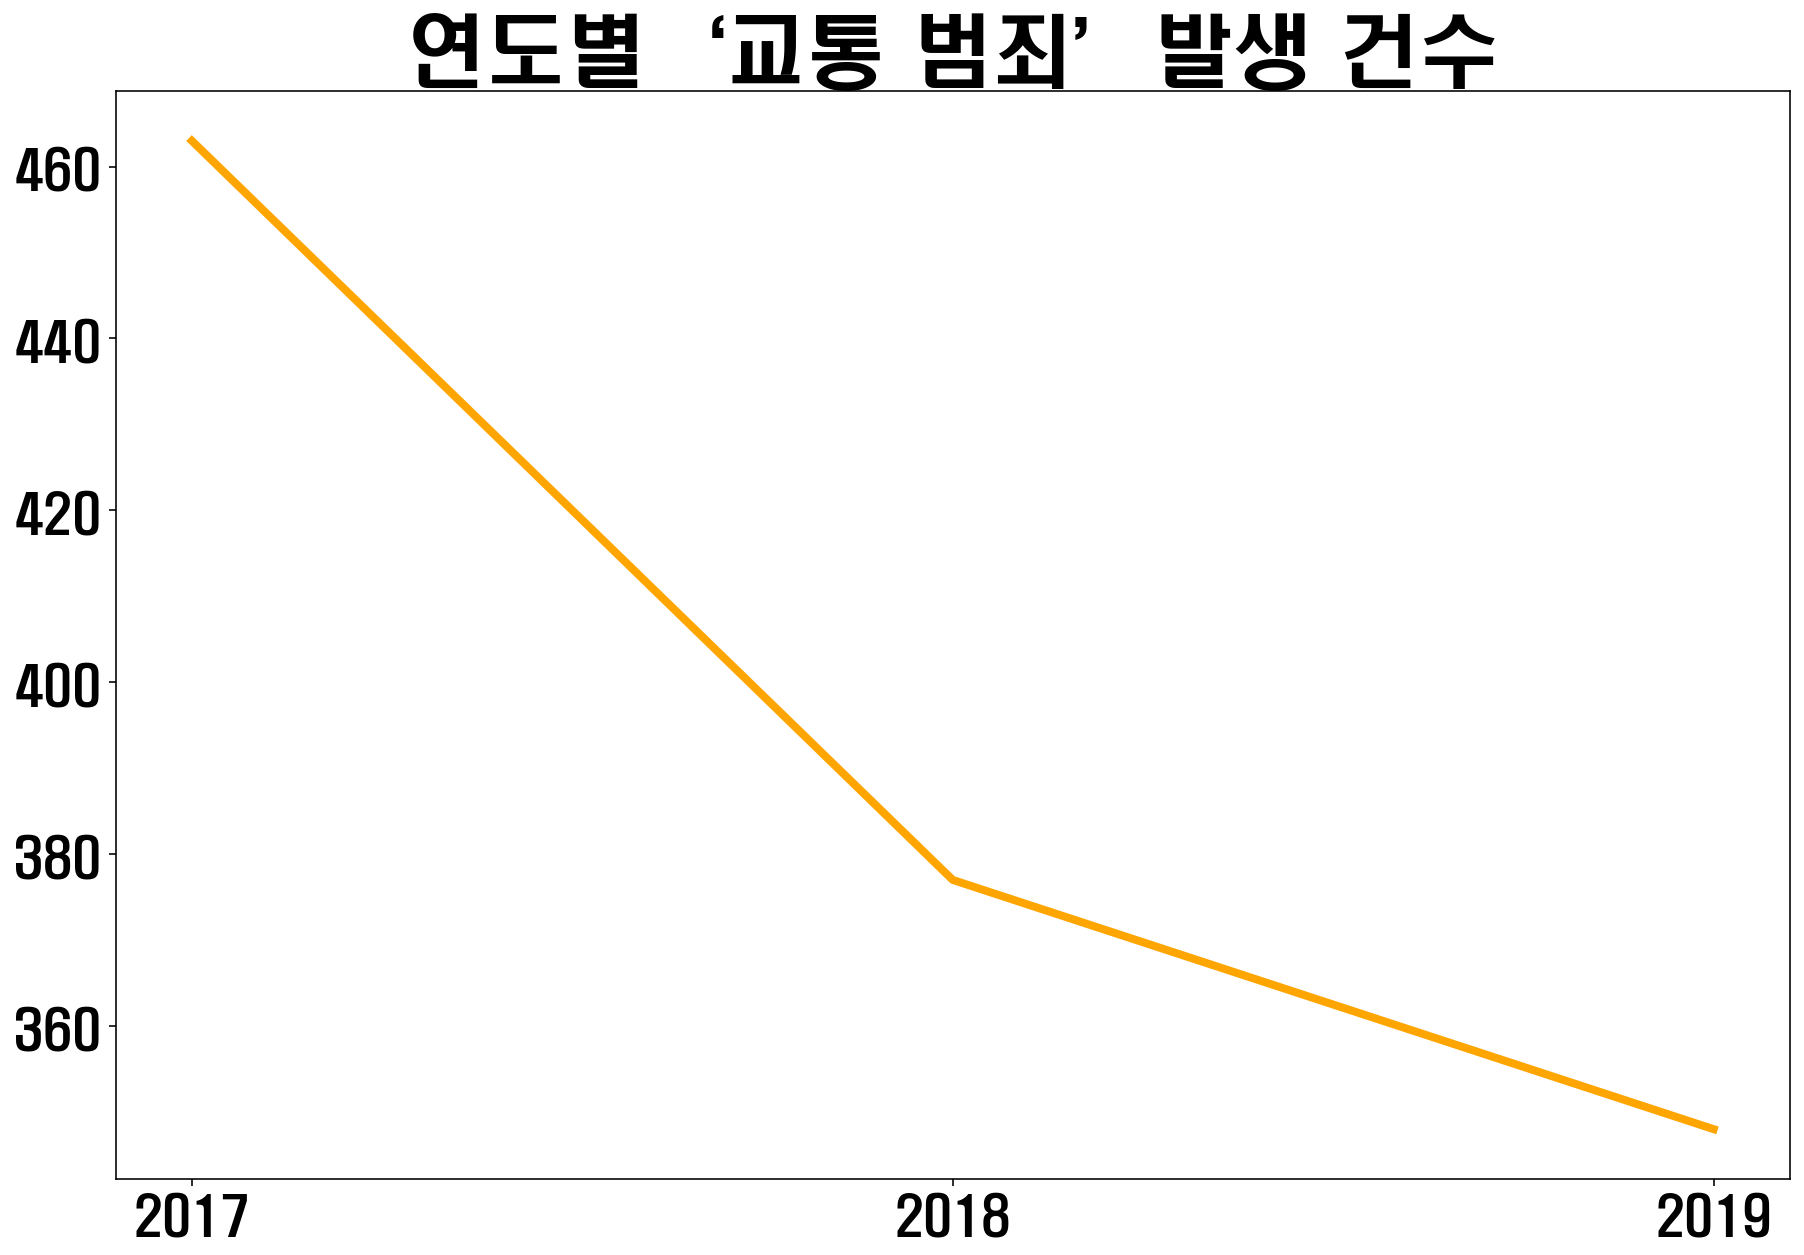

In [251]:
plt.figure(figsize=(15,10))
temp= othercrime.loc[:,['교통','년도']].groupby('년도').sum()
temp['천건당']= round(temp['교통']/1000)
ax = sns.lineplot(x=temp.index, y='천건당', data=temp, color='orange', linewidth=4)
plt.title('연도별‘교통 범죄’발생 건수', fontsize=40)
ax.set(ylabel='', xlabel='')
plt.show()

## 5대 범죄 분석 (살인, 강도, 강간, 절도, 폭력)

In [252]:
detail = pd.read_csv(r'C:\Users\best\Desktop\팀플\data/criminal_five.csv', header=None)

In [253]:
detail.columns = ['날짜','경찰서명','발생건수(전체)','발생요일(일)','발생요일(월)','발생요일(화)','발생요일(수)','발생요일(목)','발생요일(금)','발생요일(토)','발생시간대_00','발생시간대_01','발생시간대_02','발생시간대_03','발생시간대_04','발생시간대_05','발생시간대_06','발생시간대_07','발생시간대_08','발생시간대_09','발생시간대_10','발생시간대_11','발생시간대_12','발생시간대_13','발생시간대_14','발생시간대_15','발생시간대_16','발생시간대_17'
,'발생시간대_18','발생시간대_19','발생시간대_20','발생시간대_21','발생시간대_22','발생시간대_23','수사단서(피해자신고)','수사단서(고소)','수사단서(현행범)','수사단서(여죄)','수사단서(탐문정보)','수사단서(타인신고)','수사단서(진정)','수사단서(피해품발견)','수사단서(불심건문)','수사단서(자수)','수사단서(변사체)','수사단서(기타)'
]

In [254]:
detailset= detail.iloc[:,0:34]

In [255]:
detailset['새벽(04시~07시)'] = detailset['발생시간대_04']+detailset['발생시간대_05']+detailset['발생시간대_06']
detailset['아침(07시~09시)'] = detailset['발생시간대_07']+detailset['발생시간대_08']
detailset['오전(09시~12시)'] = detailset['발생시간대_09']+ detailset['발생시간대_10']+detailset['발생시간대_11']
detailset['오후(12시~17시)'] = detailset['발생시간대_12']+detailset['발생시간대_13']+detailset['발생시간대_14']+\
                                    detailset['발생시간대_15']+detailset['발생시간대_16']+detailset['발생시간대_17']
detailset['저녁(18시~19시)'] = detailset['발생시간대_18']+detailset['발생시간대_19']
detailset['밤(20시~04시)'] = detailset['발생시간대_20']+detailset['발생시간대_21']+detailset['발생시간대_22']+\
                                detailset['발생시간대_23']+detailset['발생시간대_00']+detailset['발생시간대_01']+\
                                    detailset['발생시간대_02']+ detailset['발생시간대_03']

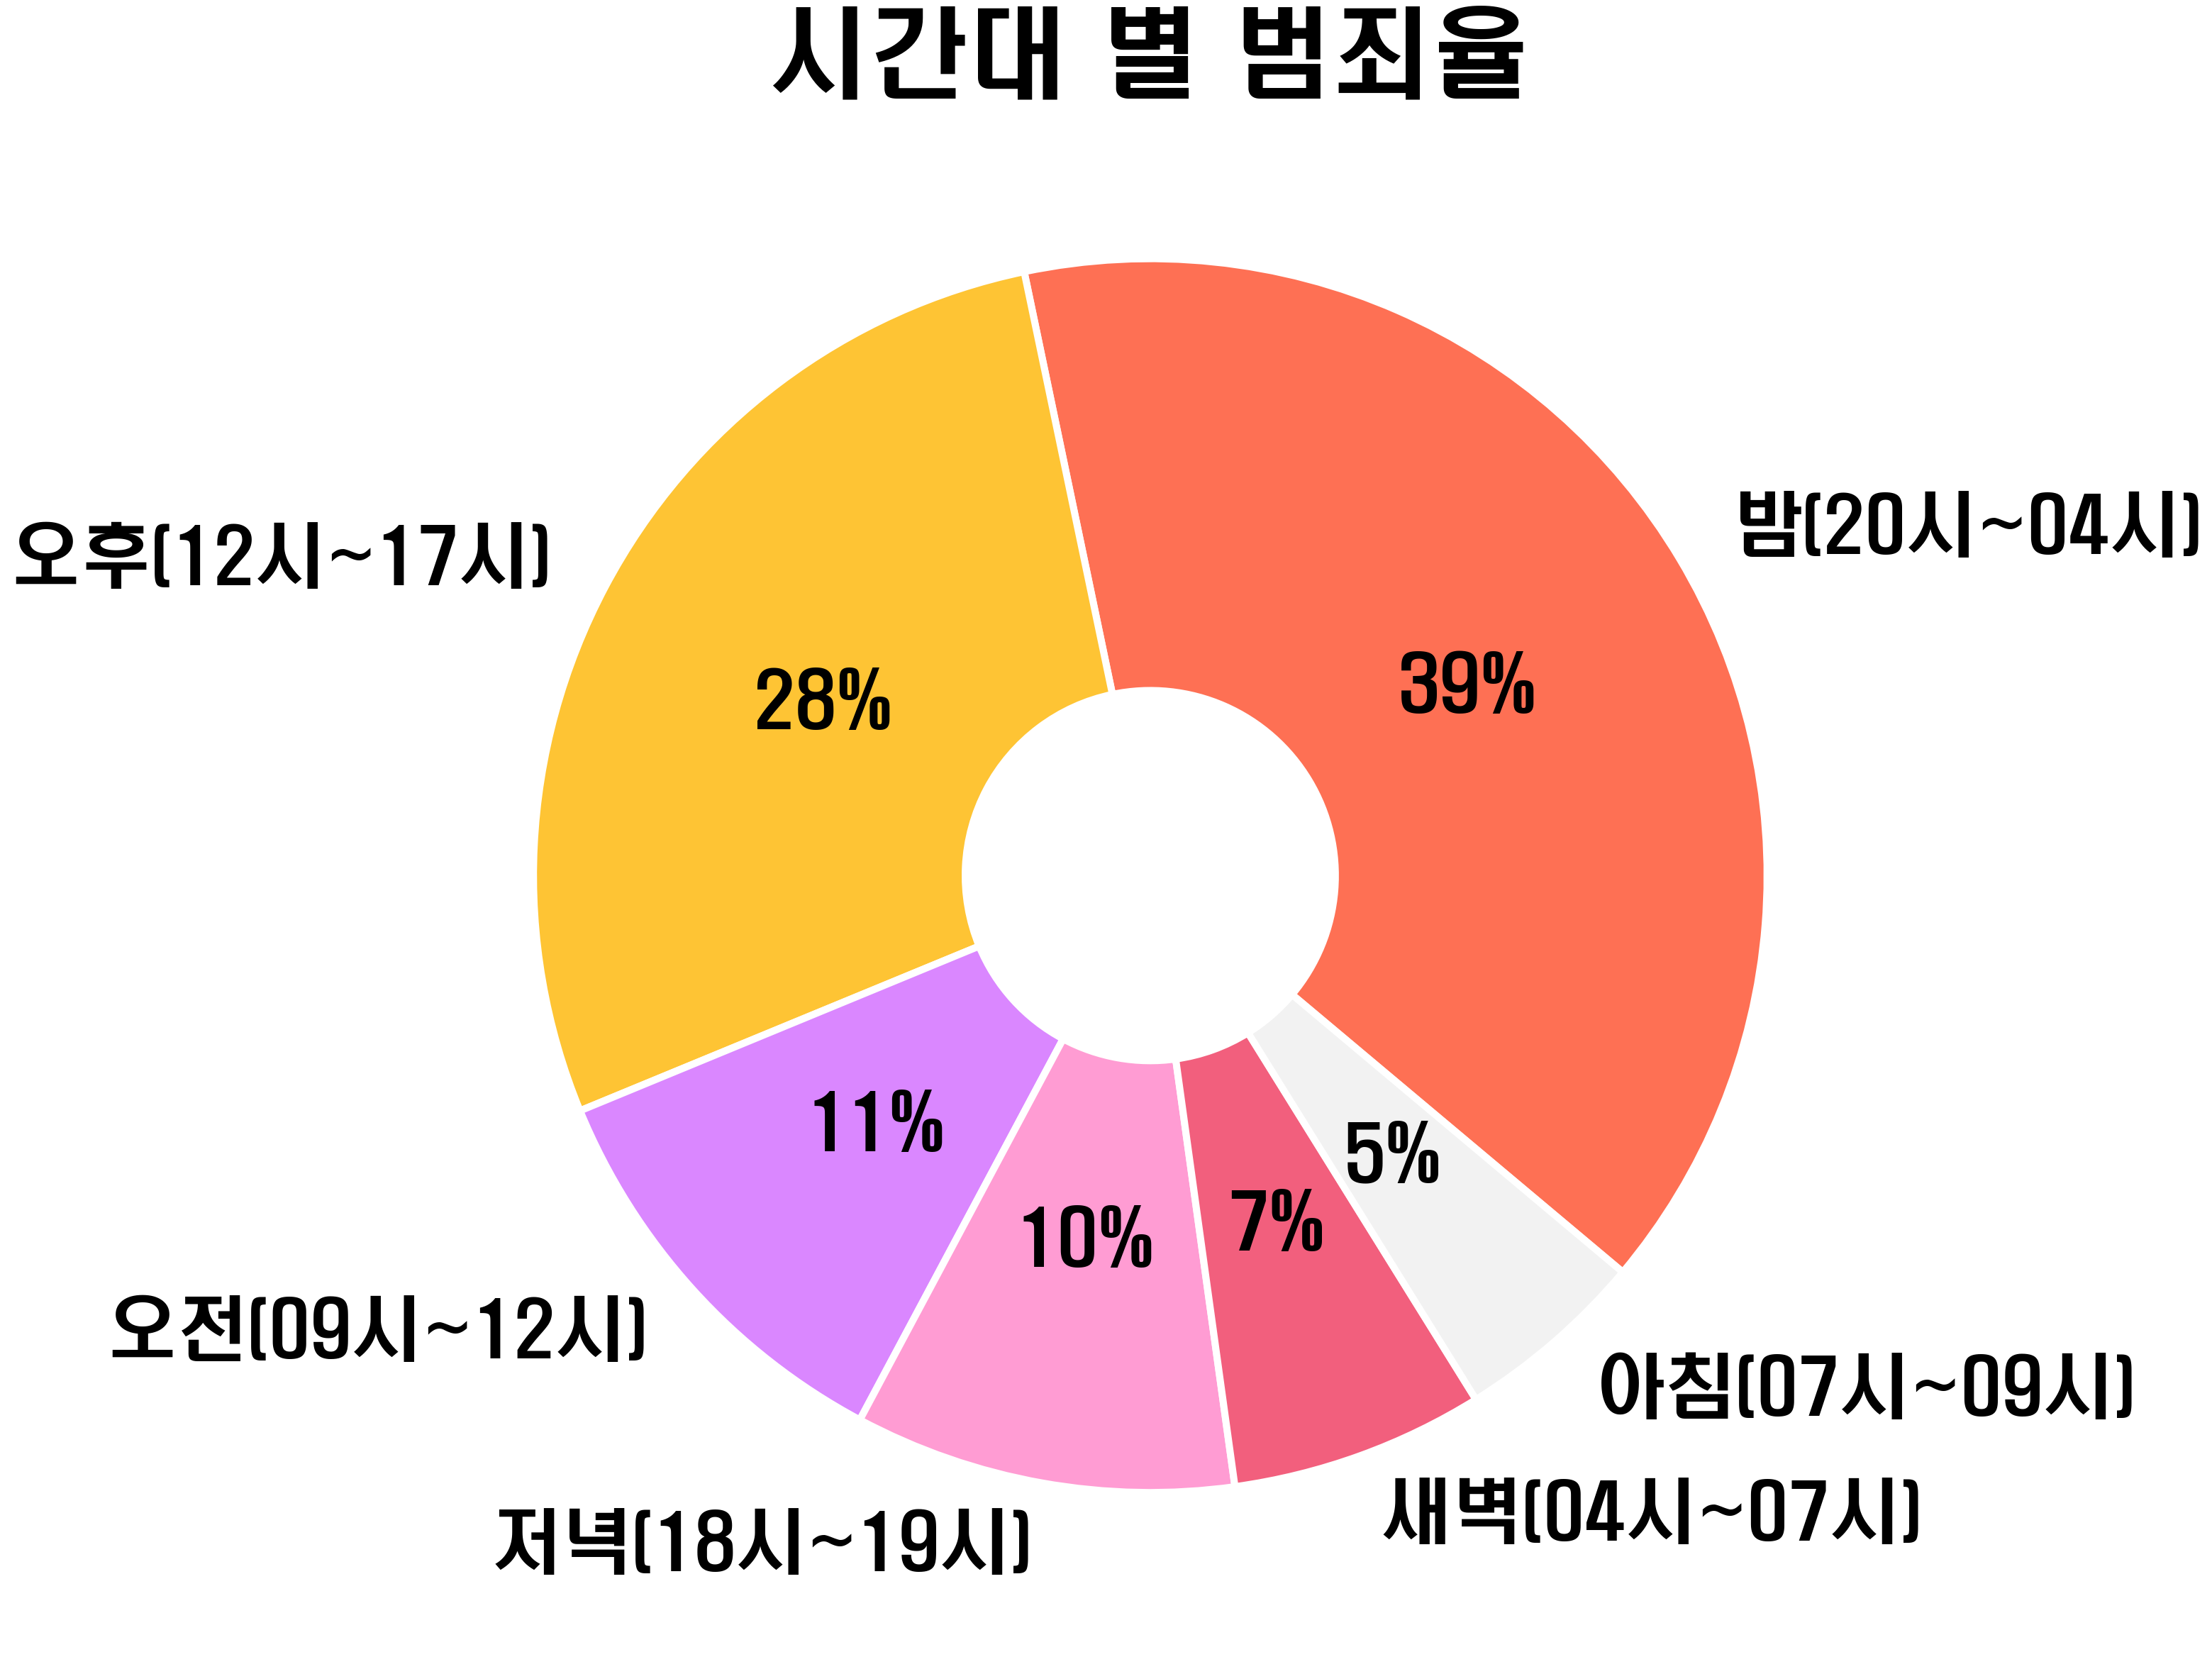

In [261]:
chart = detailset.iloc[:,-1:-7:-1].mean().sort_values(ascending=False)
plt.figure(figsize=(20,20))
plt.title('시간대 별 범죄율', fontsize=70)
colors = ['#fe7054', '#fec434', '#da87ff', '#ff9cd3', '#f25f7d', '#f2f2f2']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(x=chart, labels=chart.index, autopct='%1.f%%', data=chart ,startangle=320, 
       colors=colors, wedgeprops=wedgeprops)
plt.rc('font', size=50)
plt.show()

# 국민청원 중 '범죄' 관련 타이틀 키워드 분석

In [2]:
import pandas as pd
nationalpetition = pd.read_csv(r'C:\Users\tjoeun\Desktop\팀플\data/expiration_petition.csv')
len(nationalpetition)

12803

In [3]:
for i in range(len(nationalpetition)):
    nationalpetition['참여인원'][i]= nationalpetition['참여인원'][i].split('명')[0].replace(',','')
nationalpetition.head()

,분류,제목,만료날짜,참여인원
0,육아/교육,학교폭력 가해자의 생활기록부 이력 삭제 권한을 피해자에게 주세요,2021-03-28,2742
1,미래,대구경북신공항 특별법을 통과시켜주세요!!,2021-03-28,640
2,보건복지,강원대와 강릉원주대의 통합을 반대합니다.,2021-03-28,440
3,정치개혁,택배 노동조합의 갑질,2021-03-28,2204
4,보건복지,“故김동희”어린이를 기억하시나요? 저는 편도수술 의료사고의 추가 피해자입니다. 더 ...,2021-03-28,18761


In [4]:
nationalpetition.loc[:,'참여인원']=  nationalpetition.loc[:,'참여인원'].astype('int64')
nationalpetition.dropna(inplace=True)
nationalpetition['만료날짜']=  nationalpetition['만료날짜'].map(lambda x : x[0:7])
nationalpetition['연도']= nationalpetition['만료날짜'].map(lambda x : int(x.split('-')[0]))
nationalpetition['월'] = nationalpetition['만료날짜'].map(lambda x : int(x.split('-')[1]))

In [5]:
lastyear_petition = nationalpetition.loc[nationalpetition['연도']==2020]
lastyear_petition.index = range(len(lastyear_petition))

In [6]:
top300= lastyear_petition.sort_values(by='참여인원',ascending=False)['제목']
temp= [x for x in top300 if '범죄' in x]

In [36]:
len(top300)

10457

In [7]:
import nltk
from konlpy.tag import Komoran
import re

komoran = Komoran()

test_list = []
for i in range(len(temp)):
    test_result= ''.join(re.findall(r'[가-힣 ]',temp[i]))
    test_list.append(test_result)
clear = ''.join(test_list)

In [8]:
word_list= []
word_list.append(komoran.nouns(clear))

In [21]:
temp = [x for x in word_list[0] if len(x)>1 and x!='해주' and \
        x!='니다'  and x!='사건' and x!='강화' and x!='주세' and x!='청원' and x!='범죄']

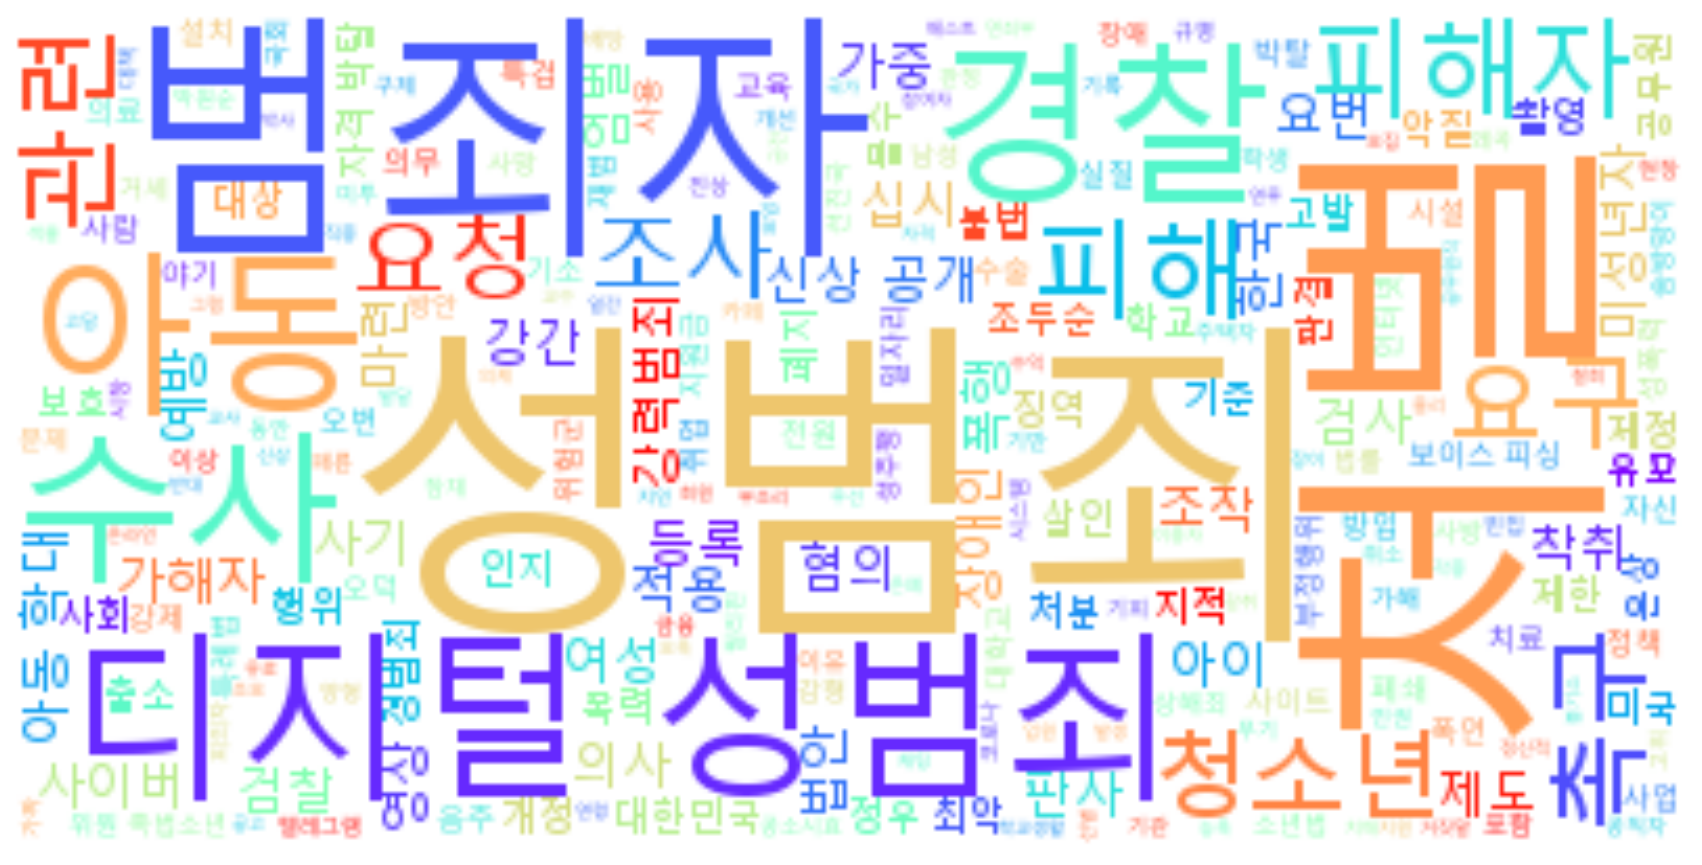

In [55]:
from wordcloud import WordCloud
wordc = WordCloud(background_color='white',
                 max_words=300,
                 font_path="c:/Windows/fonts/malgun.ttf",
                 relative_scaling=0.2,
                 colormap='rainbow')
wordc.generate(' '.join(temp))
plt.figure(figsize=(15,15))
plt.imshow(wordc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [23]:
nltk.Text(temp).vocab().most_common(30)

[('성범죄', 70),
 ('처벌', 47),
 ('범죄자', 29),
 ('아동', 16),
 ('디지털', 12),
 ('경찰', 11),
 ('수사', 11),
 ('피해자', 9),
 ('신상', 8),
 ('피해', 8),
 ('촉구', 8),
 ('관련', 8),
 ('공개', 7),
 ('요구', 7),
 ('청소년', 7),
 ('요청', 7),
 ('조사', 7),
 ('착취', 6),
 ('가해자', 6),
 ('십시', 6),
 ('의사', 6),
 ('박탈', 6),
 ('판사', 6),
 ('검찰', 6),
 ('미성년자', 6),
 ('가중', 6),
 ('학대', 6),
 ('검사', 5),
 ('등록', 5),
 ('사이버', 5)]